# SP23-DAP FINAL PROJECT

### Context
This dataset is a derivative of Reinhart et. al's Global Financial Stability dataset which can be found online at: https://www.hbs.edu/behavioral-finance-and-financial-stability/data/Pages/global.aspx

The dataset will be valuable to those who seek to understand the dynamics of financial stability within the African context.

### Content
The dataset specifically focuses on the Banking, Debt, Financial, Inflation and Systemic Crises that occurred, from 1860 to 2014, in 13 African countries, including: Algeria, Angola, Central African Republic, Ivory Coast, Egypt, Kenya, Mauritius, Morocco, Nigeria, South Africa, Tunisia, Zambia and Zimbabwe.

### Acknowledgements
Reinhart, C., Rogoff, K., Trebesch, C. and Reinhart, V. (2019) Global Crises Data by Country.
[online] https://www.hbs.edu/behavioral-finance-and-financial-stability/data. Available at: https://www.hbs.edu/behavioral-finance-and-financial-stability/data/Pages/global.aspx [Accessed: 17 July 2019].



# <b/>Following is the Data Dictionary for Africa Economic, Banking and Systemic Crisis dataset </b>



In [2]:
# Importing all the Libraries I need for this project.

import pandas as pd
import numpy as np
import seaborn as sns

import scipy.stats as stats
import statsmodels.formula.api as sm
import statsmodels.formula.api as smf

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline 


# I will include below codes when importing my libraries
 
pd.set_option('display.max_columns', None) # shows all the columns in dataset
pd.set_option('display.max_rows', None) ## shows all rows in dataset

In [3]:
# Import the pokemon.csv file. Nickname the file "pk" and preview the first 5 rows.

ac = pd.read_csv("african_crises.csv")

# <font color=GOLDENROD>Data Exploration</font>

In [4]:
ac.head()

case  cc3  country  year  systemic_crisis  exch_usd  \
0     1  DZA  Algeria  1870                1  0.052264   
1     1  DZA  Algeria  1871                0  0.052798   
2     1  DZA  Algeria  1872                0  0.052274   
3     1  DZA  Algeria  1873                0  0.051680   
4     1  DZA  Algeria  1874                0  0.051308   

   domestic_debt_in_default  sovereign_external_debt_default  \
0                         0                                0   
1                         0                                0   
2                         0                                0   
3                         0                                0   
4                         0                                0   

   gdp_weighted_default  inflation_annual_cpi  independence  currency_crises  \
0                   0.0              3.441456             0                0   
1                   0.0             14.149140             0                0   
2                   0.0             -3.718593             0                0   
3                   0.0             11.203897             0                0   
4                   0.0             -3.848561             0                0   

   inflation_crises banking_crisis  
0                 0         crisis  
1                 0      no_crisis  
2                 0      no_crisis  
3                 0      no_crisis  
4                 0      no_crisis

In [5]:
ac.tail()

case  cc3   country  year  systemic_crisis  exch_usd  \
1054    70  ZWE  Zimbabwe  2009                1     354.8   
1055    70  ZWE  Zimbabwe  2010                0     378.2   
1056    70  ZWE  Zimbabwe  2011                0     361.9   
1057    70  ZWE  Zimbabwe  2012                0     361.9   
1058    70  ZWE  Zimbabwe  2013                0     361.9   

      domestic_debt_in_default  sovereign_external_debt_default  \
1054                         1                                1   
1055                         1                                1   
1056                         1                                1   
1057                         1                                1   
1058                         1                                1   

      gdp_weighted_default  inflation_annual_cpi  independence  \
1054                   0.0                -7.670             1   
1055                   0.0                 3.217             1   
1056                   0.0                 4.920             1   
1057                   0.0                 3.720             1   
1058                   0.0                 1.632             1   

      currency_crises  inflation_crises banking_crisis  
1054                1                 0         crisis  
1055                0                 0      no_crisis  
1056                0                 0      no_crisis  
1057                0                 0      no_crisis  
1058                0                 0      no_crisis

In [6]:
ac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [7]:
ac.describe()

case         year  systemic_crisis     exch_usd  \
count  1059.000000  1059.000000      1059.000000  1059.000000   
mean     35.613787  1967.767705         0.077432    43.140831   
std      23.692402    33.530632         0.267401   111.475380   
min       1.000000  1860.000000         0.000000     0.000000   
25%      15.000000  1951.000000         0.000000     0.195350   
50%      38.000000  1973.000000         0.000000     0.868400   
75%      56.000000  1994.000000         0.000000     8.462750   
max      70.000000  2014.000000         1.000000   744.306139   

       domestic_debt_in_default  sovereign_external_debt_default  \
count               1059.000000                      1059.000000   
mean                   0.039660                         0.152975   
std                    0.195251                         0.360133   
min                    0.000000                         0.000000   
25%                    0.000000                         0.000000   
50%                    0.000000                         0.000000   
75%                    0.000000                         0.000000   
max                    1.000000                         1.000000   

       gdp_weighted_default  inflation_annual_cpi  independence  \
count           1059.000000          1.059000e+03   1059.000000   
mean               0.006402          2.084889e+04      0.776204   
std                0.043572          6.757274e+05      0.416984   
min                0.000000         -2.850214e+01      0.000000   
25%                0.000000          2.086162e+00      1.000000   
50%                0.000000          5.762330e+00      1.000000   
75%                0.000000          1.164405e+01      1.000000   
max                0.400000          2.198970e+07      1.000000   

       currency_crises  inflation_crises  
count      1059.000000       1059.000000  
mean          0.132200          0.129367  
std           0.349847          0.335765  
min           0.000000          0.000000  
25%           0.000000          0.000000  
50%           0.000000          0.000000  
75%           0.000000          0.000000  
max           2.000000          1.000000

In [8]:
ac.corr()

case      year  systemic_crisis  \
case                             1.000000  0.115574         0.010991   
year                             0.115574  1.000000         0.197450   
systemic_crisis                  0.010991  0.197450         1.000000   
exch_usd                        -0.231976  0.248757         0.202687   
domestic_debt_in_default         0.128358  0.136828         0.122158   
sovereign_external_debt_default -0.039262  0.271890         0.249850   
gdp_weighted_default            -0.032981 -0.054670         0.005274   
inflation_annual_cpi             0.044762  0.037035         0.106452   
independence                     0.021858  0.407360         0.147083   
currency_crises                  0.095339  0.189390         0.112751   
inflation_crises                 0.006405  0.098630         0.172562   

                                 exch_usd  domestic_debt_in_default  \
case                            -0.231976                  0.128358   
year                             0.248757                  0.136828   
systemic_crisis                  0.202687                  0.122158   
exch_usd                         1.000000                  0.005253   
domestic_debt_in_default         0.005253                  1.000000   
sovereign_external_debt_default  0.422890                  0.464751   
gdp_weighted_default            -0.040726                 -0.029874   
inflation_annual_cpi            -0.011947                  0.151832   
independence                     0.126034                  0.109120   
currency_crises                 -0.056472                  0.227585   
inflation_crises                -0.063783                  0.224429   

                                 sovereign_external_debt_default  \
case                                                   -0.039262   
year                                                    0.271890   
systemic_crisis                                         0.249850   
exch_usd                                                0.422890   
domestic_debt_in_default                                0.464751   
sovereign_external_debt_default                         1.000000   
gdp_weighted_default                                    0.345919   
inflation_annual_cpi                                    0.072609   
independence                                            0.228192   
currency_crises                                         0.199428   
inflation_crises                                        0.187930   

                                 gdp_weighted_default  inflation_annual_cpi  \
case                                        -0.032981              0.044762   
year                                        -0.054670              0.037035   
systemic_crisis                              0.005274              0.106452   
exch_usd                                    -0.040726             -0.011947   
domestic_debt_in_default                    -0.029874              0.151832   
sovereign_external_debt_default              0.345919              0.072609   
gdp_weighted_default                         1.000000             -0.004535   
inflation_annual_cpi                        -0.004535              1.000000   
independence                                 0.078936              0.016569   
currency_crises                              0.016970              0.076590   
inflation_crises                             0.017630              0.080060   

                                 independence  currency_crises  \
case                                 0.021858         0.095339   
year                                 0.407360         0.189390   
systemic_crisis                      0.147083         0.112751   
exch_usd                             0.126034        -0.056472   
domestic_debt_in_default             0.109120         0.227585   
sovereign_external_debt_default      0.228192         0.199428   
gdp_weighted_default                 0.078936         0.016970   
inflation_annual_cpi     

In [9]:
ac.columns

Index(['case', 'cc3', 'country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis'],
      dtype='object')

In [10]:
ac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [11]:
ac.shape

(1059, 14)

In [12]:
ac.columns

Index(['case', 'cc3', 'country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis'],
      dtype='object')

In [13]:
ac.count()

case                               1059
cc3                                1059
country                            1059
year                               1059
systemic_crisis                    1059
exch_usd                           1059
domestic_debt_in_default           1059
sovereign_external_debt_default    1059
gdp_weighted_default               1059
inflation_annual_cpi               1059
independence                       1059
currency_crises                    1059
inflation_crises                   1059
banking_crisis                     1059
dtype: int64

In [14]:
ac.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [15]:
ac.loc[ac.duplicated()]

Empty DataFrame
Columns: [case, cc3, country, year, systemic_crisis, exch_usd, domestic_debt_in_default, sovereign_external_debt_default, gdp_weighted_default, inflation_annual_cpi, independence, currency_crises, inflation_crises, banking_crisis]
Index: []

In [16]:
ac.isnull().sum()

case                               0
cc3                                0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

In [17]:
ac.loc[ac.isnull().any(axis = 1)]

Empty DataFrame
Columns: [case, cc3, country, year, systemic_crisis, exch_usd, domestic_debt_in_default, sovereign_external_debt_default, gdp_weighted_default, inflation_annual_cpi, independence, currency_crises, inflation_crises, banking_crisis]
Index: []

In [18]:
ac.isnull().sum().sort_values(ascending=False)

case                               0
cc3                                0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

In [19]:
# I will include below codes when importing my libraries

pd.set_option('display.max_columns', None) # shows all the columns in dataset
pd.set_option('display.max_rows', None) ## shows all rows in dataset

ac

case  cc3                   country  year  systemic_crisis  \
0        1  DZA                   Algeria  1870                1   
1        1  DZA                   Algeria  1871                0   
2        1  DZA                   Algeria  1872                0   
3        1  DZA                   Algeria  1873                0   
4        1  DZA                   Algeria  1874                0   
5        1  DZA                   Algeria  1875                0   
6        1  DZA                   Algeria  1876                0   
7        1  DZA                   Algeria  1877                0   
8        1  DZA                   Algeria  1878                0   
9        1  DZA                   Algeria  1879                0   
10       1  DZA                   Algeria  1880                0   
11       1  DZA                   Algeria  1881                0   
12       1  DZA                   Algeria  1882                0   
13       1  DZA                   Algeria  1883                0   
14       1  DZA                   Algeria  1884                0   
15       1  DZA                   Algeria  1939                0   
16       1  DZA                   Algeria  1940                0   
17       1  DZA                   Algeria  1941                0   
18       1  DZA                   Algeria  1942                0   
19       1  DZA                   Algeria  1943                0   
20       1  DZA                   Algeria  1944                0   
21       1  DZA                   Algeria  1945                0   
22       1  DZA                   Algeria  1946                0   
23       1  DZA                   Algeria  1947                0   
24       1  DZA                   Algeria  1948                0   
25       1  DZA                   Algeria  1949                0   
26       1  DZA                   Algeria  1950                0   
27       1  DZA                   Algeria  1951                0   
28       1  DZA                   Algeria  1952                0   
29       1  DZA                   Algeria  1953                0   
30       1  DZA                   Algeria  1954                0   
31       1  DZA                   Algeria  1955                0   
32       1  DZA                   Algeria  1956                0   
33       1  DZA                   Algeria  1957                0   
34       1  DZA                   Algeria  1958                0   
35       1  DZA                   Algeria  1959                0   
36       1  DZA                   Algeria  1960                0   
37       1  DZA                   Algeria  1961                0   
38       1  DZA                   Algeria  1968                0   
39       1  DZA                   Algeria  1969                0   
40       1  DZA                   Algeria  1970                0   
41       1  DZA                   Algeria  1971                0   
42       1  DZA                   Algeria  1972                0   
43       1  DZA                   Algeria  1973                0   
44       1  DZA                   Algeria  1974                0   
45       1  DZA                   Algeria  1975                0   
46       1  DZA                   Algeria  1976                0   
47       1  DZA                   Algeria  1977                0   
48       1  DZA                   Algeria  1978                0   
49       1  DZA                   Algeria  1979                0   
50       1  DZA                   Algeria  1980                0   
51       1  DZA                   Algeria  1981                0   
52       1  DZA                   Algeria  1982                0   
53       1  DZA                   Algeria  1983                0   
54       1  DZA                   Algeria  1984                0   
55       1  DZA                   Algeria  1985                0   
56       1  DZA                   Algeria  1986                0   
57       1  DZA                   Algeria  1987               

In [20]:
# Dropping all the "NaN"/"Null" rows that have missing data in the dataframe.

# I this case there is none

ac.dropna(inplace=True)

ac

case  cc3                   country  year  systemic_crisis  \
0        1  DZA                   Algeria  1870                1   
1        1  DZA                   Algeria  1871                0   
2        1  DZA                   Algeria  1872                0   
3        1  DZA                   Algeria  1873                0   
4        1  DZA                   Algeria  1874                0   
5        1  DZA                   Algeria  1875                0   
6        1  DZA                   Algeria  1876                0   
7        1  DZA                   Algeria  1877                0   
8        1  DZA                   Algeria  1878                0   
9        1  DZA                   Algeria  1879                0   
10       1  DZA                   Algeria  1880                0   
11       1  DZA                   Algeria  1881                0   
12       1  DZA                   Algeria  1882                0   
13       1  DZA                   Algeria  1883                0   
14       1  DZA                   Algeria  1884                0   
15       1  DZA                   Algeria  1939                0   
16       1  DZA                   Algeria  1940                0   
17       1  DZA                   Algeria  1941                0   
18       1  DZA                   Algeria  1942                0   
19       1  DZA                   Algeria  1943                0   
20       1  DZA                   Algeria  1944                0   
21       1  DZA                   Algeria  1945                0   
22       1  DZA                   Algeria  1946                0   
23       1  DZA                   Algeria  1947                0   
24       1  DZA                   Algeria  1948                0   
25       1  DZA                   Algeria  1949                0   
26       1  DZA                   Algeria  1950                0   
27       1  DZA                   Algeria  1951                0   
28       1  DZA                   Algeria  1952                0   
29       1  DZA                   Algeria  1953                0   
30       1  DZA                   Algeria  1954                0   
31       1  DZA                   Algeria  1955                0   
32       1  DZA                   Algeria  1956                0   
33       1  DZA                   Algeria  1957                0   
34       1  DZA                   Algeria  1958                0   
35       1  DZA                   Algeria  1959                0   
36       1  DZA                   Algeria  1960                0   
37       1  DZA                   Algeria  1961                0   
38       1  DZA                   Algeria  1968                0   
39       1  DZA                   Algeria  1969                0   
40       1  DZA                   Algeria  1970                0   
41       1  DZA                   Algeria  1971                0   
42       1  DZA                   Algeria  1972                0   
43       1  DZA                   Algeria  1973                0   
44       1  DZA                   Algeria  1974                0   
45       1  DZA                   Algeria  1975                0   
46       1  DZA                   Algeria  1976                0   
47       1  DZA                   Algeria  1977                0   
48       1  DZA                   Algeria  1978                0   
49       1  DZA                   Algeria  1979                0   
50       1  DZA                   Algeria  1980                0   
51       1  DZA                   Algeria  1981                0   
52       1  DZA                   Algeria  1982                0   
53       1  DZA                   Algeria  1983                0   
54       1  DZA                   Algeria  1984                0   
55       1  DZA                   Algeria  1985                0   
56       1  DZA                   Algeria  1986                0   
57       1  DZA                   Algeria  1987               

In [21]:
ac.loc[ac["year"] == 1880]

case  cc3  country  year  systemic_crisis  exch_usd  \
10      1  DZA  Algeria  1880                0  0.052356   
303    19  EGY    Egypt  1880                0  0.201000   

     domestic_debt_in_default  sovereign_external_debt_default  \
10                          0                                0   
303                         0                                1   

     gdp_weighted_default  inflation_annual_cpi  independence  \
10                    0.0              3.881188             0   
303                   0.4              1.784804             1   

     currency_crises  inflation_crises banking_crisis  
10                 0                 0      no_crisis  
303                0                 0      no_crisis

In [22]:
ac.loc[ac["country"] == "Zimbabwe"]

case  cc3   country  year  systemic_crisis      exch_usd  \
969     70  ZWE  Zimbabwe  1921                0  4.810000e-27   
970     70  ZWE  Zimbabwe  1922                0  4.340000e-27   
971     70  ZWE  Zimbabwe  1923                0  4.590000e-27   
972     70  ZWE  Zimbabwe  1927                0  4.100000e-27   
973     70  ZWE  Zimbabwe  1928                0  4.120000e-27   
974     70  ZWE  Zimbabwe  1929                0  4.100000e-27   
975     70  ZWE  Zimbabwe  1930                0  4.120000e-27   
976     70  ZWE  Zimbabwe  1931                0  5.930000e-27   
977     70  ZWE  Zimbabwe  1932                0  6.100000e-27   
978     70  ZWE  Zimbabwe  1933                0  3.910000e-27   
979     70  ZWE  Zimbabwe  1934                0  4.040000e-27   
980     70  ZWE  Zimbabwe  1935                0  4.060000e-27   
981     70  ZWE  Zimbabwe  1936                0  4.080000e-27   
982     70  ZWE  Zimbabwe  1937                0  4.000000e-27   
983     70  ZWE  Zimbabwe  1938                0  4.280000e-27   
984     70  ZWE  Zimbabwe  1939                0  5.090000e-27   
985     70  ZWE  Zimbabwe  1940                0  4.960000e-27   
986     70  ZWE  Zimbabwe  1941                0  4.960000e-27   
987     70  ZWE  Zimbabwe  1942                0  4.960000e-27   
988     70  ZWE  Zimbabwe  1943                0  4.960000e-27   
989     70  ZWE  Zimbabwe  1944                0  4.960000e-27   
990     70  ZWE  Zimbabwe  1945                0  4.960000e-27   
991     70  ZWE  Zimbabwe  1946                0  4.960000e-27   
992     70  ZWE  Zimbabwe  1947                0  4.960000e-27   
993     70  ZWE  Zimbabwe  1948                0  4.960000e-27   
994     70  ZWE  Zimbabwe  1949                0  7.140000e-27   
995     70  ZWE  Zimbabwe  1950                0  7.140000e-27   
996     70  ZWE  Zimbabwe  1951                0  7.140000e-27   
997     70  ZWE  Zimbabwe  1952                0  7.140000e-27   
998     70  ZWE  Zimbabwe  1953                0  7.140000e-27   
999     70  ZWE  Zimbabwe  1954                0  7.140000e-27   
1000    70  ZWE  Zimbabwe  1955                0  7.140000e-27   
1001    70  ZWE  Zimbabwe  1956                0  7.180000e-27   
1002    70  ZWE  Zimbabwe  1957                0  7.100000e-27   
1003    70  ZWE  Zimbabwe  1958                0  7.100000e-27   
1004    70  ZWE  Zimbabwe  1959                0  7.120000e-27   
1005    70  ZWE  Zimbabwe  1960                0  7.150000e-27   
1006    70  ZWE  Zimbabwe  1961                0  7.110000e-27   
1007    70  ZWE  Zimbabwe  1962                0  7.140000e-27   
1008    70  ZWE  Zimbabwe  1963                0  7.140000e-27   
1009    70  ZWE  Zimbabwe  1964                0  7.140000e-27   
1010    70  ZWE  Zimbabwe  1965                0  7.140000e-27   
1011    70  ZWE  Zimbabwe  1966                0  7.140000e-27   
1012    70  ZWE  Zimbabwe  1967                0  7.140000e-27   
1013    70  ZWE  Zimbabwe  1968                0  7.140000e-27   
1014    70  ZWE  Zimbabwe  1969                0  7.140000e-27   
1015    70  ZWE  Zimbabwe  1970                0  7.160000e-27   
1016    70  ZWE  Zimbabwe  1971                0  6.710000e-27   
1017    70  ZWE  Zimbabwe  1972                0  6.520000e-27   
1018    70  ZWE  Zimbabwe  1973                0  6.060000e-27   
1019    70  ZWE  Zimbabwe  1974                0  5.490000e-27   
1020    70  ZWE  Zimbabwe  1975                0  6.250000e-27   
1021    70  ZWE  Zimbabwe  1976                0  6.190000e-27   
1022    70  ZWE  Zimbabwe  1977                0  6.470000e-27   
1023    70  ZWE  Zimbabwe  1978                0  6.750000e-27   
1024    70  ZWE  Zimbabwe  1979                0  6.740000e-27   
1025    70  ZWE  Zimbabwe  1980                0  6.310000e-27   
1026    70  ZWE  Zimbabwe  1981                0  7.230000e-27   
1027    70  ZWE  Zimbabwe  1982                0  7.390000e-27   
1028    70  ZWE  Zimbabwe  1983               

In [23]:
ac.banking_crisis

0          crisis
1       no_crisis
2       no_crisis
3       no_crisis
4       no_crisis
5       no_crisis
6       no_crisis
7       no_crisis
8       no_crisis
9       no_crisis
10      no_crisis
11      no_crisis
12      no_crisis
13      no_crisis
14      no_crisis
15      no_crisis
16      no_crisis
17      no_crisis
18      no_crisis
19      no_crisis
20      no_crisis
21      no_crisis
22      no_crisis
23      no_crisis
24      no_crisis
25      no_crisis
26      no_crisis
27      no_crisis
28      no_crisis
29      no_crisis
30      no_crisis
31      no_crisis
32      no_crisis
33      no_crisis
34      no_crisis
35      no_crisis
36      no_crisis
37      no_crisis
38      no_crisis
39      no_crisis
40      no_crisis
41      no_crisis
42      no_crisis
43      no_crisis
44      no_crisis
45      no_crisis
46      no_crisis
47      no_crisis
48      no_crisis
49      no_crisis
50      no_crisis
51      no_crisis
52      no_crisis
53      no_crisis
54      no_crisis
55      no

In [24]:
# Changing the categorical variables for "banking_crisis" to numerical values.

ac["banking_crisis"].replace(["crisis", "no_crisis"],[0,1], inplace=True)

ac

case  cc3                   country  year  systemic_crisis  \
0        1  DZA                   Algeria  1870                1   
1        1  DZA                   Algeria  1871                0   
2        1  DZA                   Algeria  1872                0   
3        1  DZA                   Algeria  1873                0   
4        1  DZA                   Algeria  1874                0   
5        1  DZA                   Algeria  1875                0   
6        1  DZA                   Algeria  1876                0   
7        1  DZA                   Algeria  1877                0   
8        1  DZA                   Algeria  1878                0   
9        1  DZA                   Algeria  1879                0   
10       1  DZA                   Algeria  1880                0   
11       1  DZA                   Algeria  1881                0   
12       1  DZA                   Algeria  1882                0   
13       1  DZA                   Algeria  1883                0   
14       1  DZA                   Algeria  1884                0   
15       1  DZA                   Algeria  1939                0   
16       1  DZA                   Algeria  1940                0   
17       1  DZA                   Algeria  1941                0   
18       1  DZA                   Algeria  1942                0   
19       1  DZA                   Algeria  1943                0   
20       1  DZA                   Algeria  1944                0   
21       1  DZA                   Algeria  1945                0   
22       1  DZA                   Algeria  1946                0   
23       1  DZA                   Algeria  1947                0   
24       1  DZA                   Algeria  1948                0   
25       1  DZA                   Algeria  1949                0   
26       1  DZA                   Algeria  1950                0   
27       1  DZA                   Algeria  1951                0   
28       1  DZA                   Algeria  1952                0   
29       1  DZA                   Algeria  1953                0   
30       1  DZA                   Algeria  1954                0   
31       1  DZA                   Algeria  1955                0   
32       1  DZA                   Algeria  1956                0   
33       1  DZA                   Algeria  1957                0   
34       1  DZA                   Algeria  1958                0   
35       1  DZA                   Algeria  1959                0   
36       1  DZA                   Algeria  1960                0   
37       1  DZA                   Algeria  1961                0   
38       1  DZA                   Algeria  1968                0   
39       1  DZA                   Algeria  1969                0   
40       1  DZA                   Algeria  1970                0   
41       1  DZA                   Algeria  1971                0   
42       1  DZA                   Algeria  1972                0   
43       1  DZA                   Algeria  1973                0   
44       1  DZA                   Algeria  1974                0   
45       1  DZA                   Algeria  1975                0   
46       1  DZA                   Algeria  1976                0   
47       1  DZA                   Algeria  1977                0   
48       1  DZA                   Algeria  1978                0   
49       1  DZA                   Algeria  1979                0   
50       1  DZA                   Algeria  1980                0   
51       1  DZA                   Algeria  1981                0   
52       1  DZA                   Algeria  1982                0   
53       1  DZA                   Algeria  1983                0   
54       1  DZA                   Algeria  1984                0   
55       1  DZA                   Algeria  1985                0   
56       1  DZA                   Algeria  1986                0   
57       1  DZA                   Algeria  1987               

In [25]:
ac.banking_crisis

0       0
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
30      1
31      1
32      1
33      1
34      1
35      1
36      1
37      1
38      1
39      1
40      1
41      1
42      1
43      1
44      1
45      1
46      1
47      1
48      1
49      1
50      1
51      1
52      1
53      1
54      1
55      1
56      1
57      1
58      1
59      1
60      0
61      0
62      0
63      1
64      1
65      1
66      1
67      1
68      1
69      1
70      1
71      1
72      1
73      1
74      1
75      1
76      1
77      1
78      1
79      1
80      1
81      1
82      1
83      1
84      1
85      1
86      1
87      1
88      1
89      1
90      1
91      1
92      1
93      1
94      1
95      1
96      1
97      1
98      1
99      1


<AxesSubplot:>

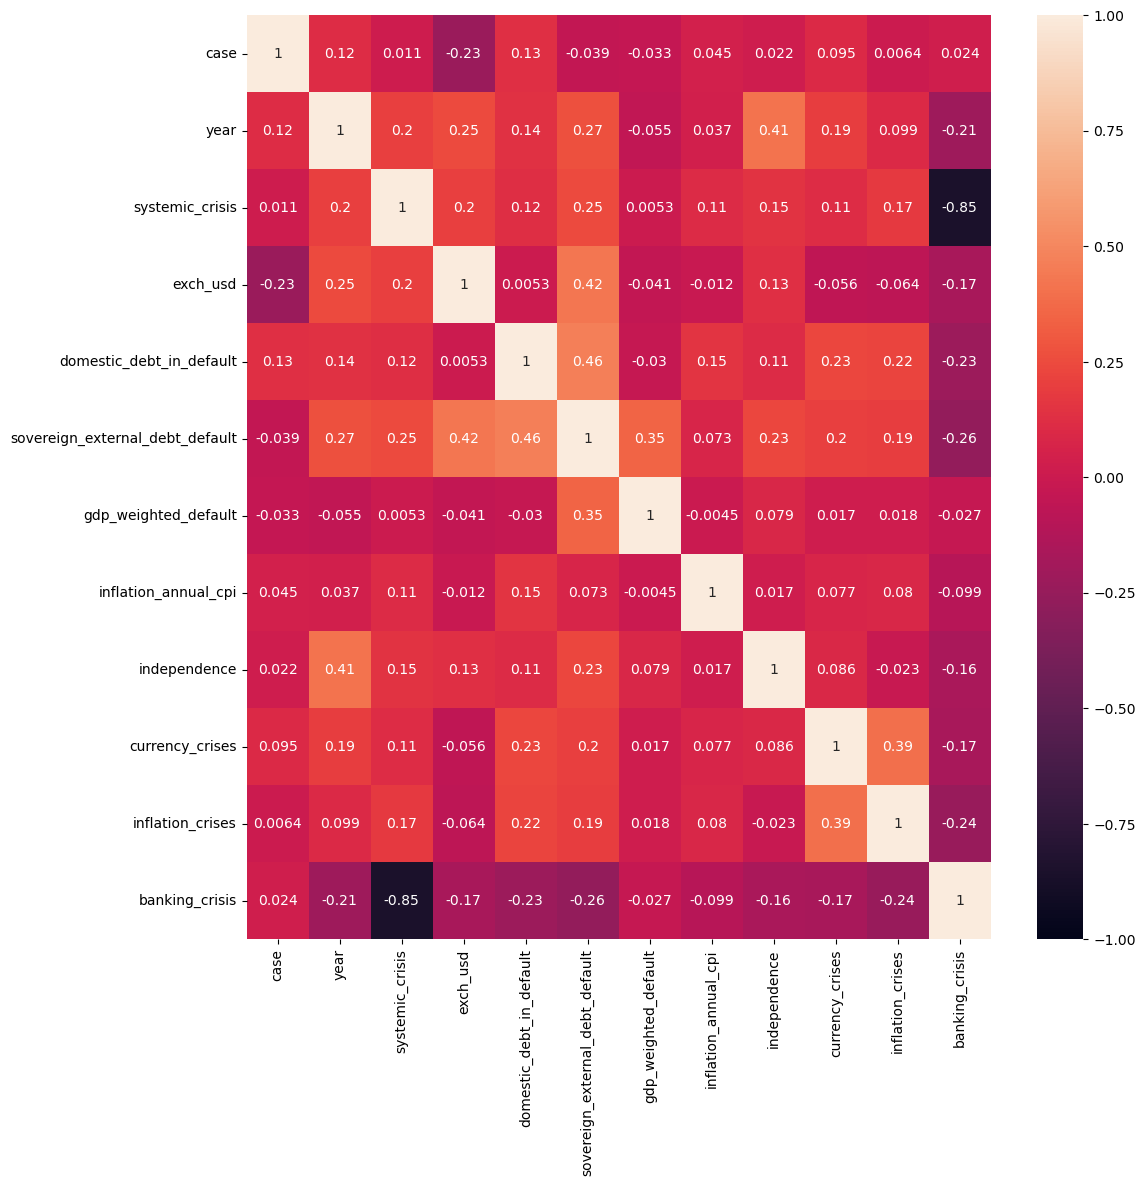

In [26]:
# Showing correlation of stats via heatmap

plt.figure(figsize=(12,12))

# Calculate the correlation matrix for the numeric dataset 

corr = ac.corr()

# Plot a heat map to show the magnitude of the correlation between variables

sns.heatmap(corr, vmin = -1, annot = True)

In [27]:
acz = ac.copy()

In [28]:
acz.shape

(1059, 14)

In [29]:
acz

case  cc3                   country  year  systemic_crisis  \
0        1  DZA                   Algeria  1870                1   
1        1  DZA                   Algeria  1871                0   
2        1  DZA                   Algeria  1872                0   
3        1  DZA                   Algeria  1873                0   
4        1  DZA                   Algeria  1874                0   
5        1  DZA                   Algeria  1875                0   
6        1  DZA                   Algeria  1876                0   
7        1  DZA                   Algeria  1877                0   
8        1  DZA                   Algeria  1878                0   
9        1  DZA                   Algeria  1879                0   
10       1  DZA                   Algeria  1880                0   
11       1  DZA                   Algeria  1881                0   
12       1  DZA                   Algeria  1882                0   
13       1  DZA                   Algeria  1883                0   
14       1  DZA                   Algeria  1884                0   
15       1  DZA                   Algeria  1939                0   
16       1  DZA                   Algeria  1940                0   
17       1  DZA                   Algeria  1941                0   
18       1  DZA                   Algeria  1942                0   
19       1  DZA                   Algeria  1943                0   
20       1  DZA                   Algeria  1944                0   
21       1  DZA                   Algeria  1945                0   
22       1  DZA                   Algeria  1946                0   
23       1  DZA                   Algeria  1947                0   
24       1  DZA                   Algeria  1948                0   
25       1  DZA                   Algeria  1949                0   
26       1  DZA                   Algeria  1950                0   
27       1  DZA                   Algeria  1951                0   
28       1  DZA                   Algeria  1952                0   
29       1  DZA                   Algeria  1953                0   
30       1  DZA                   Algeria  1954                0   
31       1  DZA                   Algeria  1955                0   
32       1  DZA                   Algeria  1956                0   
33       1  DZA                   Algeria  1957                0   
34       1  DZA                   Algeria  1958                0   
35       1  DZA                   Algeria  1959                0   
36       1  DZA                   Algeria  1960                0   
37       1  DZA                   Algeria  1961                0   
38       1  DZA                   Algeria  1968                0   
39       1  DZA                   Algeria  1969                0   
40       1  DZA                   Algeria  1970                0   
41       1  DZA                   Algeria  1971                0   
42       1  DZA                   Algeria  1972                0   
43       1  DZA                   Algeria  1973                0   
44       1  DZA                   Algeria  1974                0   
45       1  DZA                   Algeria  1975                0   
46       1  DZA                   Algeria  1976                0   
47       1  DZA                   Algeria  1977                0   
48       1  DZA                   Algeria  1978                0   
49       1  DZA                   Algeria  1979                0   
50       1  DZA                   Algeria  1980                0   
51       1  DZA                   Algeria  1981                0   
52       1  DZA                   Algeria  1982                0   
53       1  DZA                   Algeria  1983                0   
54       1  DZA                   Algeria  1984                0   
55       1  DZA                   Algeria  1985                0   
56       1  DZA                   Algeria  1986                0   
57       1  DZA                   Algeria  1987               

In [30]:
# Looking for possible outliers per variables/columns

acz["zscore_systemic_crisis"] = np.abs(stats.zscore(acz["systemic_crisis"]))

acz.head()

case  cc3  country  year  systemic_crisis  exch_usd  \
0     1  DZA  Algeria  1870                1  0.052264   
1     1  DZA  Algeria  1871                0  0.052798   
2     1  DZA  Algeria  1872                0  0.052274   
3     1  DZA  Algeria  1873                0  0.051680   
4     1  DZA  Algeria  1874                0  0.051308   

   domestic_debt_in_default  sovereign_external_debt_default  \
0                         0                                0   
1                         0                                0   
2                         0                                0   
3                         0                                0   
4                         0                                0   

   gdp_weighted_default  inflation_annual_cpi  independence  currency_crises  \
0                   0.0              3.441456             0                0   
1                   0.0             14.149140             0                0   
2                   0.0             -3.718593             0                0   
3                   0.0             11.203897             0                0   
4                   0.0             -3.848561             0                0   

   inflation_crises  banking_crisis  zscore_systemic_crisis  
0                 0               0                3.451758  
1                 0               1                0.289707  
2                 0               1                0.289707  
3                 0               1                0.289707  
4                 0               1                0.289707

In [31]:
z_outliers = acz.loc[acz["zscore_systemic_crisis"] > 3].index

print(z_outliers)

Int64Index([   0,   60,   61,   62,  181,  182,  183,  184,  185,  186,  187,
             193,  194,  195,  196,  197,  198,  199,  200,  201,  202,  203,
             204,  256,  257,  258,  259,  330,  354,  403,  404,  405,  406,
             475,  476,  477,  478,  479,  482,  483,  484,  485,  486,  487,
             488,  489,  616,  617,  685,  686,  687,  688,  702,  703,  704,
             705,  706,  707,  873,  874,  875,  876,  877,  949,  950,  951,
             952, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049,
            1050, 1051, 1052, 1053, 1054],
           dtype='int64')


In [34]:
# Looking for possible outliers per variables/columns

acz["zscore_exch_usd"] = np.abs(stats.zscore(acz["exch_usd"]))

acz.head()

case  cc3  country  year  systemic_crisis  exch_usd  \
0     1  DZA  Algeria  1870                1  0.052264   
1     1  DZA  Algeria  1871                0  0.052798   
2     1  DZA  Algeria  1872                0  0.052274   
3     1  DZA  Algeria  1873                0  0.051680   
4     1  DZA  Algeria  1874                0  0.051308   

   domestic_debt_in_default  sovereign_external_debt_default  \
0                         0                                0   
1                         0                                0   
2                         0                                0   
3                         0                                0   
4                         0                                0   

   gdp_weighted_default  inflation_annual_cpi  independence  currency_crises  \
0                   0.0              3.441456             0                0   
1                   0.0             14.149140             0                0   
2                   0.0             -3.718593             0                0   
3                   0.0             11.203897             0                0   
4                   0.0             -3.848561             0                0   

   inflation_crises  banking_crisis  zscore_systemic_crisis  zscore_exch_usd  
0                 0               0                3.451758         0.386713  
1                 0               1                0.289707         0.386708  
2                 0               1                0.289707         0.386712  
3                 0               1                0.289707         0.386718  
4                 0               1                0.289707         0.386721

In [35]:
z_outliers = acz.loc[acz["zscore_exch_usd"] > 3].index

print(z_outliers)

Int64Index([ 188,  189,  190,  199,  200,  201,  202,  203,  204,  205,  206,
             207,  208,  209,  210,  211,  212,  213,  214,  215,  216,  217,
             218,  219,  251,  252,  253,  262,  263,  264,  265,  266, 1055],
           dtype='int64')


In [36]:
# Looking for possible outliers per variables/columns

acz["zscore_sovereign_external_debt_default"] = np.abs(stats.zscore(acz["sovereign_external_debt_default"]))

acz.head()

case  cc3  country  year  systemic_crisis  exch_usd  \
0     1  DZA  Algeria  1870                1  0.052264   
1     1  DZA  Algeria  1871                0  0.052798   
2     1  DZA  Algeria  1872                0  0.052274   
3     1  DZA  Algeria  1873                0  0.051680   
4     1  DZA  Algeria  1874                0  0.051308   

   domestic_debt_in_default  sovereign_external_debt_default  \
0                         0                                0   
1                         0                                0   
2                         0                                0   
3                         0                                0   
4                         0                                0   

   gdp_weighted_default  inflation_annual_cpi  independence  currency_crises  \
0                   0.0              3.441456             0                0   
1                   0.0             14.149140             0                0   
2                   0.0             -3.718593             0                0   
3                   0.0             11.203897             0                0   
4                   0.0             -3.848561             0                0   

   inflation_crises  banking_crisis  zscore_systemic_crisis  zscore_exch_usd  \
0                 0               0                3.451758         0.386713   
1                 0               1                0.289707         0.386708   
2                 0               1                0.289707         0.386712   
3                 0               1                0.289707         0.386718   
4                 0               1                0.289707         0.386721   

   zscore_sovereign_external_debt_default  
0                                0.424973  
1                                0.424973  
2                                0.424973  
3                                0.424973  
4                                0.424973

In [37]:
z_outliers = acz.loc[acz["zscore_sovereign_external_debt_default"] > 3].index

print(z_outliers)

Int64Index([], dtype='int64')


In [38]:
# Looking for possible outliers per variables/columns

acz["zscore_domestic_debt_in_default"] = np.abs(stats.zscore(acz["domestic_debt_in_default"]))

acz.head()

case  cc3  country  year  systemic_crisis  exch_usd  \
0     1  DZA  Algeria  1870                1  0.052264   
1     1  DZA  Algeria  1871                0  0.052798   
2     1  DZA  Algeria  1872                0  0.052274   
3     1  DZA  Algeria  1873                0  0.051680   
4     1  DZA  Algeria  1874                0  0.051308   

   domestic_debt_in_default  sovereign_external_debt_default  \
0                         0                                0   
1                         0                                0   
2                         0                                0   
3                         0                                0   
4                         0                                0   

   gdp_weighted_default  inflation_annual_cpi  independence  currency_crises  \
0                   0.0              3.441456             0                0   
1                   0.0             14.149140             0                0   
2                   0.0             -3.718593             0                0   
3                   0.0             11.203897             0                0   
4                   0.0             -3.848561             0                0   

   inflation_crises  banking_crisis  zscore_systemic_crisis  zscore_exch_usd  \
0                 0               0                3.451758         0.386713   
1                 0               1                0.289707         0.386708   
2                 0               1                0.289707         0.386712   
3                 0               1                0.289707         0.386718   
4                 0               1                0.289707         0.386721   

   zscore_sovereign_external_debt_default  zscore_domestic_debt_in_default  
0                                0.424973                         0.203219  
1                                0.424973                         0.203219  
2                                0.424973                         0.203219  
3                                0.424973                         0.203219  
4                                0.424973                         0.203219

In [39]:
z_outliers = acz.loc[acz["zscore_domestic_debt_in_default"] > 3].index

print(z_outliers)

Int64Index([ 133,  139,  140,  141,  142,  143,  144,  145,  146,  147,  148,
             149, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019,
            1020, 1021, 1022, 1023, 1024, 1025, 1045, 1046, 1047, 1048, 1049,
            1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058],
           dtype='int64')


In [40]:
# Looking for possible outliers per variables/columns

acz["zscore_inflation_annual_cpi"] = np.abs(stats.zscore(acz["inflation_annual_cpi"]))

acz.head()

case  cc3  country  year  systemic_crisis  exch_usd  \
0     1  DZA  Algeria  1870                1  0.052264   
1     1  DZA  Algeria  1871                0  0.052798   
2     1  DZA  Algeria  1872                0  0.052274   
3     1  DZA  Algeria  1873                0  0.051680   
4     1  DZA  Algeria  1874                0  0.051308   

   domestic_debt_in_default  sovereign_external_debt_default  \
0                         0                                0   
1                         0                                0   
2                         0                                0   
3                         0                                0   
4                         0                                0   

   gdp_weighted_default  inflation_annual_cpi  independence  currency_crises  \
0                   0.0              3.441456             0                0   
1                   0.0             14.149140             0                0   
2                   0.0             -3.718593             0                0   
3                   0.0             11.203897             0                0   
4                   0.0             -3.848561             0                0   

   inflation_crises  banking_crisis  zscore_systemic_crisis  zscore_exch_usd  \
0                 0               0                3.451758         0.386713   
1                 0               1                0.289707         0.386708   
2                 0               1                0.289707         0.386712   
3                 0               1                0.289707         0.386718   
4                 0               1                0.289707         0.386721   

   zscore_sovereign_external_debt_default  zscore_domestic_debt_in_default  \
0                                0.424973                         0.203219   
1                                0.424973                         0.203219   
2                                0.424973                         0.203219   
3                                0.424973                         0.203219   
4                                0.424973                         0.203219   

   zscore_inflation_annual_cpi  
0                     0.030863  
1                     0.030848  
2                     0.030874  
3                     0.030852  
4                     0.030874

In [41]:
z_outliers = acz.loc[acz["zscore_inflation_annual_cpi"] > 3].index

print(z_outliers)

Int64Index([1053], dtype='int64')


In [42]:
# Looking for possible outliers per variables/columns

acz["zscore_gdp_weighted_default"] = np.abs(stats.zscore(acz["gdp_weighted_default"]))

acz.head()

case  cc3  country  year  systemic_crisis  exch_usd  \
0     1  DZA  Algeria  1870                1  0.052264   
1     1  DZA  Algeria  1871                0  0.052798   
2     1  DZA  Algeria  1872                0  0.052274   
3     1  DZA  Algeria  1873                0  0.051680   
4     1  DZA  Algeria  1874                0  0.051308   

   domestic_debt_in_default  sovereign_external_debt_default  \
0                         0                                0   
1                         0                                0   
2                         0                                0   
3                         0                                0   
4                         0                                0   

   gdp_weighted_default  inflation_annual_cpi  independence  currency_crises  \
0                   0.0              3.441456             0                0   
1                   0.0             14.149140             0                0   
2                   0.0             -3.718593             0                0   
3                   0.0             11.203897             0                0   
4                   0.0             -3.848561             0                0   

   inflation_crises  banking_crisis  zscore_systemic_crisis  zscore_exch_usd  \
0                 0               0                3.451758         0.386713   
1                 0               1                0.289707         0.386708   
2                 0               1                0.289707         0.386712   
3                 0               1                0.289707         0.386718   
4                 0               1                0.289707         0.386721   

   zscore_sovereign_external_debt_default  zscore_domestic_debt_in_default  \
0                                0.424973                         0.203219   
1                                0.424973                         0.203219   
2                                0.424973                         0.203219   
3                                0.424973                         0.203219   
4                                0.424973                         0.203219   

   zscore_inflation_annual_cpi  zscore_gdp_weighted_default  
0                     0.030863                     0.147006  
1                     0.030848                     0.147006  
2                     0.030874                     0.147006  
3                     0.030852                     0.147006  
4                     0.030874                     0.147006

In [43]:
z_outliers = acz.loc[acz["zscore_gdp_weighted_default"] > 3].index

print(z_outliers)

Int64Index([61, 62, 63, 64, 65, 66, 299, 300, 301, 302, 303, 407, 793, 794,
            795, 797, 801],
           dtype='int64')


In [44]:
# Looking for possible outliers per variables/columns

acz["zscore_independence"] = np.abs(stats.zscore(acz["independence"]))

acz.head()

case  cc3  country  year  systemic_crisis  exch_usd  \
0     1  DZA  Algeria  1870                1  0.052264   
1     1  DZA  Algeria  1871                0  0.052798   
2     1  DZA  Algeria  1872                0  0.052274   
3     1  DZA  Algeria  1873                0  0.051680   
4     1  DZA  Algeria  1874                0  0.051308   

   domestic_debt_in_default  sovereign_external_debt_default  \
0                         0                                0   
1                         0                                0   
2                         0                                0   
3                         0                                0   
4                         0                                0   

   gdp_weighted_default  inflation_annual_cpi  independence  currency_crises  \
0                   0.0              3.441456             0                0   
1                   0.0             14.149140             0                0   
2                   0.0             -3.718593             0                0   
3                   0.0             11.203897             0                0   
4                   0.0             -3.848561             0                0   

   inflation_crises  banking_crisis  zscore_systemic_crisis  zscore_exch_usd  \
0                 0               0                3.451758         0.386713   
1                 0               1                0.289707         0.386708   
2                 0               1                0.289707         0.386712   
3                 0               1                0.289707         0.386718   
4                 0               1                0.289707         0.386721   

   zscore_sovereign_external_debt_default  zscore_domestic_debt_in_default  \
0                                0.424973                         0.203219   
1                                0.424973                         0.203219   
2                                0.424973                         0.203219   
3                                0.424973                         0.203219   
4                                0.424973                         0.203219   

   zscore_inflation_annual_cpi  zscore_gdp_weighted_default  \
0                     0.030863                     0.147006   
1                     0.030848                     0.147006   
2                     0.030874                     0.147006   
3                     0.030852                     0.147006   
4                     0.030874                     0.147006   

   zscore_independence  
0             1.862352  
1             1.862352  
2             1.862352  
3             1.862352  
4             1.862352

In [45]:
z_outliers = acz.loc[acz["zscore_independence"] > 3].index

print(z_outliers)

Int64Index([], dtype='int64')


In [46]:
# Looking for possible outliers per variables/columns

acz["zscore_currency_crises"] = np.abs(stats.zscore(acz["currency_crises"]))

acz.head()

case  cc3  country  year  systemic_crisis  exch_usd  \
0     1  DZA  Algeria  1870                1  0.052264   
1     1  DZA  Algeria  1871                0  0.052798   
2     1  DZA  Algeria  1872                0  0.052274   
3     1  DZA  Algeria  1873                0  0.051680   
4     1  DZA  Algeria  1874                0  0.051308   

   domestic_debt_in_default  sovereign_external_debt_default  \
0                         0                                0   
1                         0                                0   
2                         0                                0   
3                         0                                0   
4                         0                                0   

   gdp_weighted_default  inflation_annual_cpi  independence  currency_crises  \
0                   0.0              3.441456             0                0   
1                   0.0             14.149140             0                0   
2                   0.0             -3.718593             0                0   
3                   0.0             11.203897             0                0   
4                   0.0             -3.848561             0                0   

   inflation_crises  banking_crisis  zscore_systemic_crisis  zscore_exch_usd  \
0                 0               0                3.451758         0.386713   
1                 0               1                0.289707         0.386708   
2                 0               1                0.289707         0.386712   
3                 0               1                0.289707         0.386718   
4                 0               1                0.289707         0.386721   

   zscore_sovereign_external_debt_default  zscore_domestic_debt_in_default  \
0                                0.424973                         0.203219   
1                                0.424973                         0.203219   
2                                0.424973                         0.203219   
3                                0.424973                         0.203219   
4                                0.424973                         0.203219   

   zscore_inflation_annual_cpi  zscore_gdp_weighted_default  \
0                     0.030863                     0.147006   
1                     0.030848                     0.147006   
2                     0.030874                     0.147006   
3                     0.030852                     0.147006   
4                     0.030874                     0.147006   

   zscore_independence  zscore_currency_crises  
0             1.862352                0.378058  
1             1.862352                0.378058  
2             1.862352                0.378058  
3             1.862352                0.378058  
4             1.862352                0.378058

In [47]:
z_outliers = acz.loc[acz["zscore_currency_crises"] > 3].index

print(z_outliers)

Int64Index([142, 146, 775, 840], dtype='int64')


In [48]:
# Looking for possible outliers per variables/columns

acz["zscore_inflation_crises"] = np.abs(stats.zscore(acz["inflation_crises"]))

acz.head()

case  cc3  country  year  systemic_crisis  exch_usd  \
0     1  DZA  Algeria  1870                1  0.052264   
1     1  DZA  Algeria  1871                0  0.052798   
2     1  DZA  Algeria  1872                0  0.052274   
3     1  DZA  Algeria  1873                0  0.051680   
4     1  DZA  Algeria  1874                0  0.051308   

   domestic_debt_in_default  sovereign_external_debt_default  \
0                         0                                0   
1                         0                                0   
2                         0                                0   
3                         0                                0   
4                         0                                0   

   gdp_weighted_default  inflation_annual_cpi  independence  currency_crises  \
0                   0.0              3.441456             0                0   
1                   0.0             14.149140             0                0   
2                   0.0             -3.718593             0                0   
3                   0.0             11.203897             0                0   
4                   0.0             -3.848561             0                0   

   inflation_crises  banking_crisis  zscore_systemic_crisis  zscore_exch_usd  \
0                 0               0                3.451758         0.386713   
1                 0               1                0.289707         0.386708   
2                 0               1                0.289707         0.386712   
3                 0               1                0.289707         0.386718   
4                 0               1                0.289707         0.386721   

   zscore_sovereign_external_debt_default  zscore_domestic_debt_in_default  \
0                                0.424973                         0.203219   
1                                0.424973                         0.203219   
2                                0.424973                         0.203219   
3                                0.424973                         0.203219   
4                                0.424973                         0.203219   

   zscore_inflation_annual_cpi  zscore_gdp_weighted_default  \
0                     0.030863                     0.147006   
1                     0.030848                     0.147006   
2                     0.030874                     0.147006   
3                     0.030852                     0.147006   
4                     0.030874                     0.147006   

   zscore_independence  zscore_currency_crises  zscore_inflation_crises  
0             1.862352                0.378058                 0.385474  
1             1.862352                0.378058                 0.385474  
2             1.862352                0.378058                 0.385474  
3             1.862352                0.378058                 0.385474  
4             1.862352                0.378058                 0.385474

In [49]:
z_outliers = acz.loc[acz["zscore_inflation_crises"] > 3].index

print(z_outliers)

Int64Index([], dtype='int64')


In [50]:
# Looking for possible outliers per variables/columns

acz["zscore_banking_crisis"] = np.abs(stats.zscore(acz["banking_crisis"]))

acz.head()

case  cc3  country  year  systemic_crisis  exch_usd  \
0     1  DZA  Algeria  1870                1  0.052264   
1     1  DZA  Algeria  1871                0  0.052798   
2     1  DZA  Algeria  1872                0  0.052274   
3     1  DZA  Algeria  1873                0  0.051680   
4     1  DZA  Algeria  1874                0  0.051308   

   domestic_debt_in_default  sovereign_external_debt_default  \
0                         0                                0   
1                         0                                0   
2                         0                                0   
3                         0                                0   
4                         0                                0   

   gdp_weighted_default  inflation_annual_cpi  independence  currency_crises  \
0                   0.0              3.441456             0                0   
1                   0.0             14.149140             0                0   
2                   0.0             -3.718593             0                0   
3                   0.0             11.203897             0                0   
4                   0.0             -3.848561             0                0   

   inflation_crises  banking_crisis  zscore_systemic_crisis  zscore_exch_usd  \
0                 0               0                3.451758         0.386713   
1                 0               1                0.289707         0.386708   
2                 0               1                0.289707         0.386712   
3                 0               1                0.289707         0.386718   
4                 0               1                0.289707         0.386721   

   zscore_sovereign_external_debt_default  zscore_domestic_debt_in_default  \
0                                0.424973                         0.203219   
1                                0.424973                         0.203219   
2                                0.424973                         0.203219   
3                                0.424973                         0.203219   
4                                0.424973                         0.203219   

   zscore_inflation_annual_cpi  zscore_gdp_weighted_default  \
0                     0.030863                     0.147006   
1                     0.030848                     0.147006   
2                     0.030874                     0.147006   
3                     0.030852                     0.147006   
4                     0.030874                     0.147006   

   zscore_independence  zscore_currency_crises  zscore_inflation_crises  \
0             1.862352                0.378058                 0.385474   
1             1.862352                0.378058                 0.385474   
2             1.862352                0.378058                 0.385474   
3             1.862352                0.378058                 0.385474   
4             1.862352                0.378058                 0.385474   

   zscore_banking_crisis  
0               3.204053  
1               0.312105  
2               0.312105  
3               0.312105  
4               0.312105

In [51]:
z_outliers = acz.loc[acz["zscore_banking_crisis"] > 3].index

print(z_outliers)

Int64Index([   0,   60,   61,   62,  139,  140,  141,  142,  143,  144,  145,
             181,  182,  183,  184,  185,  186,  187,  193,  194,  195,  196,
             197,  198,  199,  200,  201,  202,  203,  204,  256,  257,  258,
             259,  330,  354,  404,  405,  406,  413,  414,  415,  416,  417,
             418,  475,  476,  477,  478,  482,  483,  484,  485,  554,  616,
             617,  685,  686,  687,  688,  690,  702,  703,  704,  705,  706,
             707,  785,  786,  797,  873,  874,  875,  876,  877,  949,  950,
             951,  952, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048,
            1049, 1050, 1051, 1052, 1053, 1054],
           dtype='int64')


# <font color=GOLDENROD>Data Analytics Begins after Checking for Possible Outliers </font>

In [52]:
acz.shape

(1059, 24)

In [53]:
acz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   case                                    1059 non-null   int64  
 1   cc3                                     1059 non-null   object 
 2   country                                 1059 non-null   object 
 3   year                                    1059 non-null   int64  
 4   systemic_crisis                         1059 non-null   int64  
 5   exch_usd                                1059 non-null   float64
 6   domestic_debt_in_default                1059 non-null   int64  
 7   sovereign_external_debt_default         1059 non-null   int64  
 8   gdp_weighted_default                    1059 non-null   float64
 9   inflation_annual_cpi                    1059 non-null   float64
 10  independence                            1059 non-null   int6

In [54]:
acz.describe()

case         year  systemic_crisis     exch_usd  \
count  1059.000000  1059.000000      1059.000000  1059.000000   
mean     35.613787  1967.767705         0.077432    43.140831   
std      23.692402    33.530632         0.267401   111.475380   
min       1.000000  1860.000000         0.000000     0.000000   
25%      15.000000  1951.000000         0.000000     0.195350   
50%      38.000000  1973.000000         0.000000     0.868400   
75%      56.000000  1994.000000         0.000000     8.462750   
max      70.000000  2014.000000         1.000000   744.306139   

       domestic_debt_in_default  sovereign_external_debt_default  \
count               1059.000000                      1059.000000   
mean                   0.039660                         0.152975   
std                    0.195251                         0.360133   
min                    0.000000                         0.000000   
25%                    0.000000                         0.000000   
50%                    0.000000                         0.000000   
75%                    0.000000                         0.000000   
max                    1.000000                         1.000000   

       gdp_weighted_default  inflation_annual_cpi  independence  \
count           1059.000000          1.059000e+03   1059.000000   
mean               0.006402          2.084889e+04      0.776204   
std                0.043572          6.757274e+05      0.416984   
min                0.000000         -2.850214e+01      0.000000   
25%                0.000000          2.086162e+00      1.000000   
50%                0.000000          5.762330e+00      1.000000   
75%                0.000000          1.164405e+01      1.000000   
max                0.400000          2.198970e+07      1.000000   

       currency_crises  inflation_crises  banking_crisis  \
count      1059.000000       1059.000000     1059.000000   
mean          0.132200          0.129367        0.911237   
std           0.349847          0.335765        0.284536   
min           0.000000          0.000000        0.000000   
25%           0.000000          0.000000        1.000000   
50%           0.000000          0.000000        1.000000   
75%           0.000000          0.000000        1.000000   
max           2.000000          1.000000        1.000000   

       zscore_systemic_crisis  zscore_exch_usd  \
count             1059.000000      1059.000000   
mean                 0.534550         0.593619   
std                  0.845536         0.805127   
min                  0.289707         0.002229   
25%                  0.289707         0.344483   
50%                  0.289707         0.384544   
75%                  0.289707         0.387182   
max                  3.451758         6.292839   

       zscore_sovereign_external_debt_default  \
count                             1059.000000   
mean                                 0.719926   
std                                  0.694379   
min                                  0.424973   
25%                                  0.424973   
50%                                  0.424973   
75%                                  0.424973   
max                                  2.353091   

       zscore_domestic_debt_in_default  zscore_inflation_annual_cpi  \
count                      1059.000000                  1059.000000   
mean                          0.390319                     0.061556   
std                           0.921115                     0.998575   
min                           0.203219                     0.024730   
25%                           0.203219                     0.030851   
50%                           0.203219                     0.030860   
75%                           0.203219                     0.030865   
max                           4.920801                    32.526763   

       zscore_gdp_weighted_default  zscore_independence  \
count                  1059.000000          1059.000000   
mean               

In [55]:
acz["systemic_crisis"].groupby(acz["exch_usd"]).mean()

exch_usd
0.000000e+00    0.0
3.910000e-27    0.0
4.000000e-27    0.0
4.040000e-27    0.0
4.060000e-27    0.0
4.080000e-27    0.0
4.100000e-27    0.0
4.120000e-27    0.0
4.280000e-27    0.0
4.340000e-27    0.0
4.590000e-27    0.0
4.810000e-27    0.0
4.960000e-27    0.0
5.090000e-27    0.0
5.490000e-27    0.0
5.930000e-27    0.0
6.060000e-27    0.0
6.100000e-27    0.0
6.190000e-27    0.0
6.250000e-27    0.0
6.310000e-27    0.0
6.470000e-27    0.0
6.520000e-27    0.0
6.710000e-27    0.0
6.740000e-27    0.0
6.750000e-27    0.0
7.100000e-27    0.0
7.110000e-27    0.0
7.120000e-27    0.0
7.140000e-27    0.0
7.150000e-27    0.0
7.160000e-27    0.0
7.180000e-27    0.0
7.230000e-27    0.0
7.390000e-27    0.0
1.110000e-26    0.0
1.450000e-26    0.0
1.600000e-26    0.0
1.630000e-26    0.0
1.680000e-26    0.0
1.930000e-26    0.0
2.220000e-26    0.0
2.610000e-26    0.0
5.040000e-26    0.0
5.370000e-26    0.0
6.810000e-26    0.0
8.380000e-26    0.0
9.310000e-26    1.0
1.080000e-25    1.0
1.830000e-2

Text(0.5, 1.0, 'systemic_crisis of the country linked to banking_crisis')

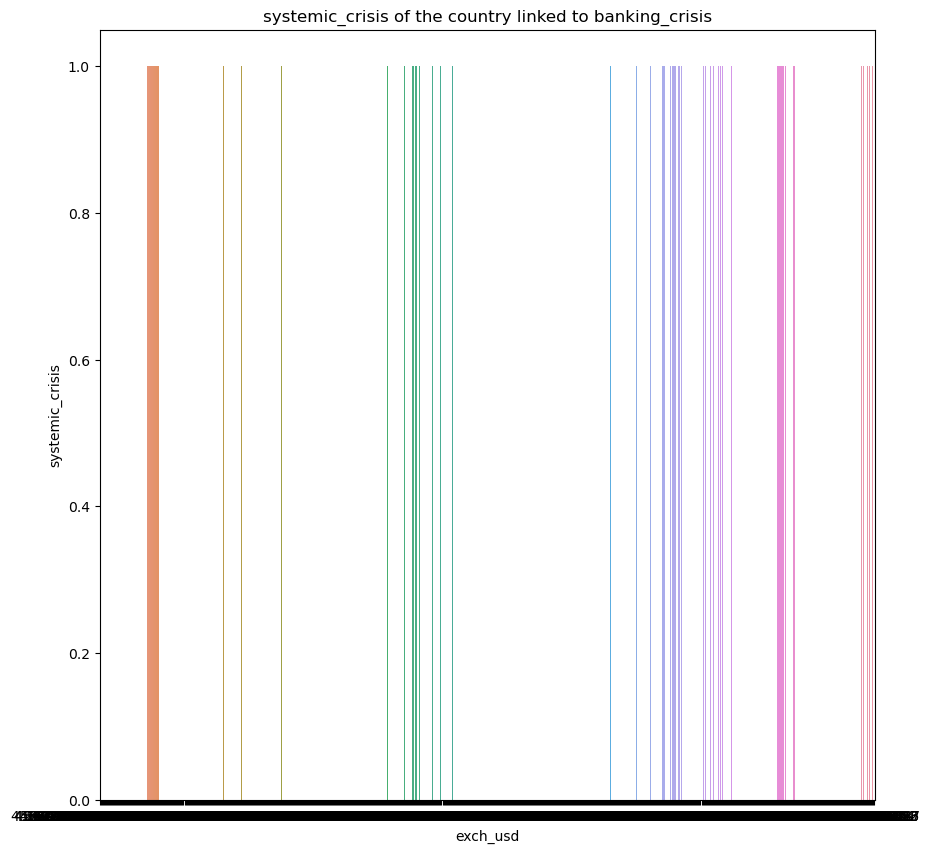

In [56]:
plt.figure(figsize=(10,10))

sns.barplot(data = acz, x = "exch_usd", y = "systemic_crisis", ci=None) 

plt.xticks(rotation = 360)
plt.title('systemic_crisis of the country linked to banking_crisis')

In [57]:
pd.crosstab(acz["systemic_crisis"],acz["exch_usd"], margins=True, normalize=False)

exch_usd         0.0  3.91e-27  4e-27  4.0400000000000005e-27  4.06e-27  \
systemic_crisis                                                           
0                 53         1      1                       1         1   
1                  0         0      0                       0         0   
All               53         1      1                       1         1   

exch_usd         4.08e-27  4.1000000000000006e-27  4.1200000000000004e-27  \
systemic_crisis                                                             
0                       1                       2                       2   
1                       0                       0                       0   
All                     1                       2                       2   

exch_usd         4.28e-27  4.34e-27  4.59e-27  4.81e-27  \
systemic_crisis                                           
0                       1         1         1         1   
1                       0         0         0         0   
All                     1         1         1         1   

exch_usd         4.9600000000000006e-27  5.0900000000000004e-27  \
systemic_crisis                                                   
0                                     9                       1   
1                                     0                       0   
All                                   9                       1   

exch_usd         5.490000000000001e-27  5.9300000000000006e-27  6.06e-27  \
systemic_crisis                                                            
0                                    1                       1         1   
1                                    0                       0         0   
All                                  1                       1         1   

exch_usd         6.100000000000001e-27  6.190000000000001e-27  6.25e-27  \
systemic_crisis                                                           
0                                    1                      1         1   
1                                    0                      0         0   
All                                  1                      1         1   

exch_usd         6.31e-27  6.470000000000001e-27  6.520000000000001e-27  \
systemic_crisis                                                           
0                       1                      1                      1   
1                       0                      0                      0   
All                     1                      1                      1   

exch_usd         6.71e-27  6.740000000000001e-27  6.750000000000001e-27  \
systemic_crisis                                                           
0                       1                      1                      1   
1                       0                      0                      0   
All                     1                      1                      1   

exch_usd         7.1e-27  7.11e-27  7.12e-27  7.140000000000001e-27  \
systemic_crisis                                                       
0                      2         1         1                     15   
1                      0         0         0                      0   
All                    2         1         1                     15   

exch_usd         7.150000000000001e-27  7.16e-27  7.18e-27  7.23e-27  \
systemic_crisis                                                        
0                                    1         1         1         1   
1                                    0         0         0         0   
All                                  1         1         1         1   

exch_usd         7.39e-27  1.11e-26  1.4500000000000002e-26  1.6e-26  \
systemic_crisis                                                        
0                       1         1                       1        1   
1                       0         0                       0        0   
All                     1         1                       1        1   

exch_usd         1.

In [58]:
acz["systemic_crisis"].groupby(acz["domestic_debt_in_default"]).mean()

domestic_debt_in_default
0    0.070796
1    0.238095
Name: systemic_crisis, dtype: float64

Text(0.5, 1.0, 'systemic_crisis of the country linked to domestic_debt_in_default')

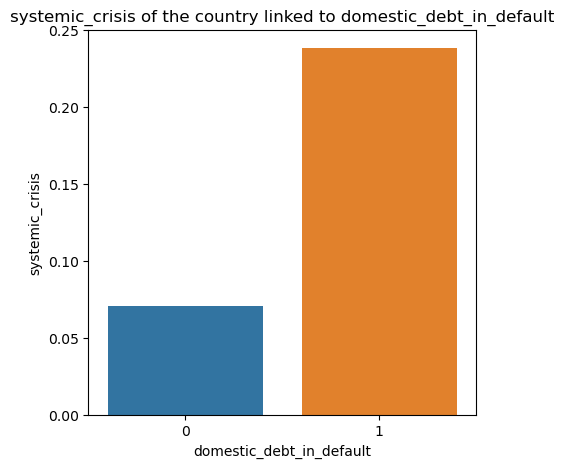

In [59]:
plt.figure(figsize=(5,5))

sns.barplot(data = acz, x = "domestic_debt_in_default", y = "systemic_crisis", ci=None) 

plt.xticks(rotation = 360)
plt.title('systemic_crisis of the country linked to domestic_debt_in_default')

In [60]:
pd.crosstab(acz["systemic_crisis"],acz["domestic_debt_in_default"], margins=True, normalize=False)

domestic_debt_in_default     0   1   All
systemic_crisis                         
0                          945  32   977
1                           72  10    82
All                       1017  42  1059

In [61]:
acz["systemic_crisis"].groupby(acz["sovereign_external_debt_default"]).mean()

sovereign_external_debt_default
0    0.049052
1    0.234568
Name: systemic_crisis, dtype: float64

Text(0.5, 1.0, 'systemic_crisis of the country linked to sovereign_external_debt_default')

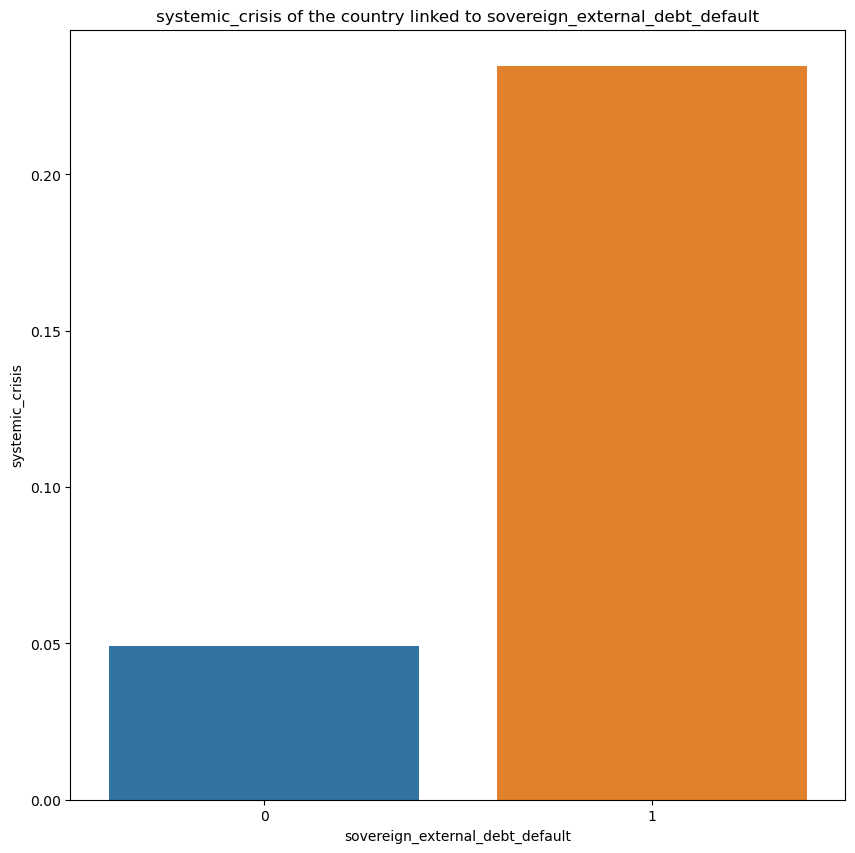

In [62]:
plt.figure(figsize=(10,10))

sns.barplot(data = acz, x = "sovereign_external_debt_default", y = "systemic_crisis", ci=None) 

plt.xticks(rotation = 360)
plt.title('systemic_crisis of the country linked to sovereign_external_debt_default')

In [63]:
pd.crosstab(acz["systemic_crisis"],acz["sovereign_external_debt_default"], margins=True, normalize=False)

sovereign_external_debt_default    0    1   All
systemic_crisis                                
0                                853  124   977
1                                 44   38    82
All                              897  162  1059

In [70]:
acz["systemic_crisis"].groupby(acz["gdp_weighted_default"]).mean()

gdp_weighted_default
0.00    0.076774
0.06    0.000000
0.13    0.166667
0.23    0.333333
0.36    0.000000
0.40    0.000000
Name: systemic_crisis, dtype: float64

Text(0.5, 1.0, 'systemic_crisis of the country linked to gdp_weighted_default')

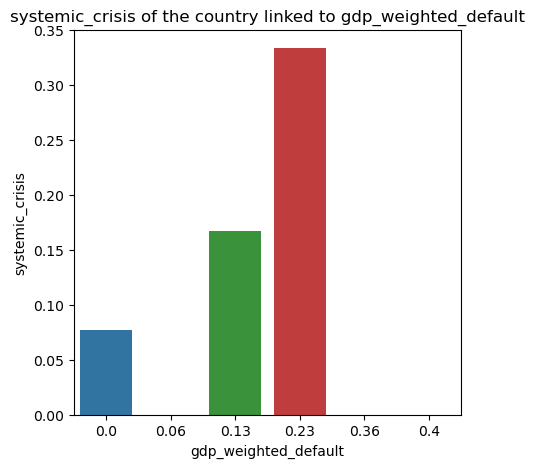

In [64]:
plt.figure(figsize=(5,5))

sns.barplot(data = acz, x = "gdp_weighted_default", y = "systemic_crisis", ci=None) 

plt.xticks(rotation = 360)
plt.title('systemic_crisis of the country linked to gdp_weighted_default')

In [72]:
pd.crosstab(acz["systemic_crisis"],acz["gdp_weighted_default"], margins=True, normalize=False)

gdp_weighted_default   0.0  0.06  0.13  0.23  0.36  0.4   All
systemic_crisis                                              
0                      950     7     5     4     5    6   977
1                       79     0     1     2     0    0    82
All                   1029     7     6     6     5    6  1059

In [73]:
acz["systemic_crisis"].groupby(acz["inflation_annual_cpi"]).mean()

inflation_annual_cpi
-2.850214e+01    0.0
-2.717949e+01    0.0
-2.092418e+01    0.0
-1.807366e+01    0.0
-1.742424e+01    0.0
-1.724138e+01    0.0
-1.687243e+01    0.0
-1.683136e+01    0.0
-1.600061e+01    0.0
-1.594203e+01    0.0
-1.392253e+01    0.0
-1.388889e+01    0.0
-1.240815e+01    0.0
-1.235613e+01    0.0
-1.233241e+01    0.0
-1.180677e+01    0.0
-1.174188e+01    0.0
-1.135480e+01    0.0
-1.090448e+01    0.0
-1.087425e+01    0.0
-1.084824e+01    0.0
-1.025484e+01    0.0
-9.793127e+00    0.0
-9.174312e+00    0.0
-9.090909e+00    0.0
-8.823529e+00    0.0
-8.528073e+00    0.0
-8.356956e+00    0.0
-8.264217e+00    0.0
-8.236853e+00    0.0
-7.692308e+00    0.0
-7.670000e+00    1.0
-7.533146e+00    0.0
-7.251482e+00    0.0
-7.249727e+00    0.0
-7.042254e+00    0.0
-7.017544e+00    0.0
-6.986000e+00    0.0
-6.922295e+00    0.0
-6.753725e+00    0.0
-6.438575e+00    0.0
-6.374422e+00    0.0
-6.216944e+00    0.0
-5.578664e+00    0.0
-5.432641e+00    0.0
-5.319149e+00    0.0
-5.130349e+00

Text(0.5, 1.0, 'systemic_crisis of the country linked to inflation_annual_cpi')

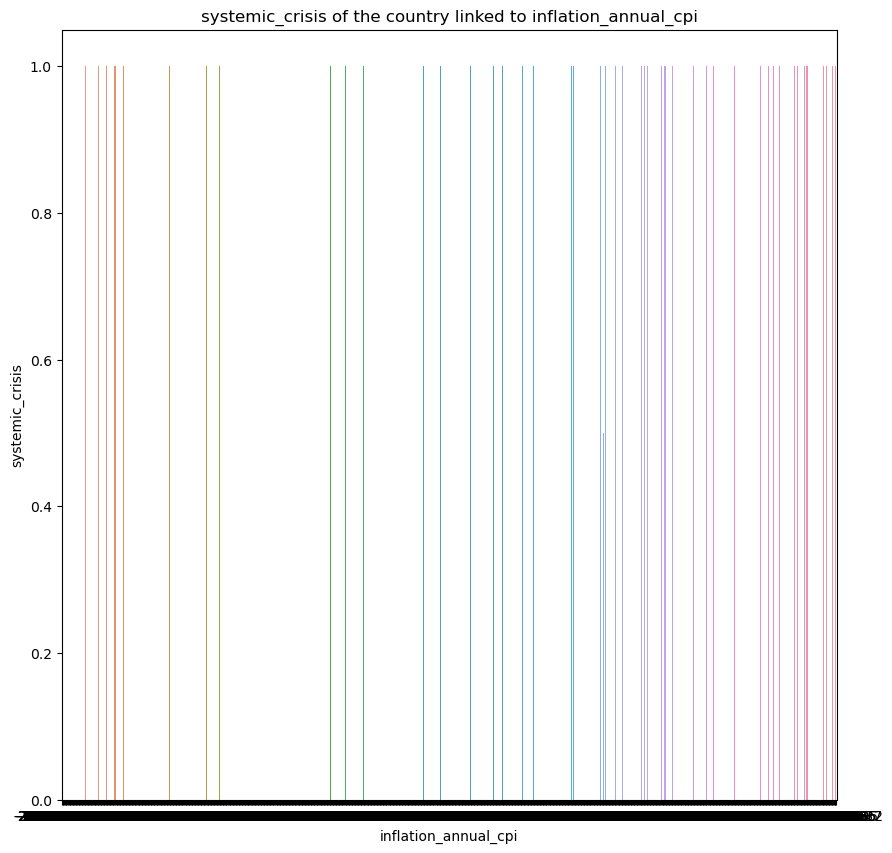

In [74]:
plt.figure(figsize=(10,10))

sns.barplot(data = acz, x = "inflation_annual_cpi", y = "systemic_crisis", ci=None) 

plt.xticks(rotation = 360)
plt.title('systemic_crisis of the country linked to inflation_annual_cpi')

In [75]:
pd.crosstab(acz["systemic_crisis"],acz["inflation_annual_cpi"], margins=True, normalize=False)

inflation_annual_cpi  -28.50213688  -27.17948718  -20.92417833  -18.07365899  \
systemic_crisis                                                                
0                                1             1             1             1   
1                                0             0             0             0   
All                              1             1             1             1   

inflation_annual_cpi  -17.42424242  -17.24137931  -16.87242798  -16.83135705  \
systemic_crisis                                                                
0                                1             1             1             1   
1                                0             0             0             0   
All                              1             1             1             1   

inflation_annual_cpi  -16.00060551  -15.94202899  -13.92253028  -13.88888889  \
systemic_crisis                                                                
0                                1             1             1             1   
1                                0             0             0             0   
All                              1             1             1             1   

inflation_annual_cpi  -12.40814963  -12.35612729  -12.33241115  -11.8067676  \
systemic_crisis                                                               
0                                1             1             1            1   
1                                0             0             0            0   
All                              1             1             1            1   

inflation_annual_cpi  -11.7418844  -11.35479535  -10.90447887  -10.87425348  \
systemic_crisis                                                               
0                               1             1             1             1   
1                               0             0             0             0   
All                             1             1             1             1   

inflation_annual_cpi  -10.84823995  -10.25483916  -9.7931274  -9.174311927  \
systemic_crisis                                                              
0                                1             1           1             1   
1                                0             0           0             0   
All                              1             1           1             1   

inflation_annual_cpi  -9.090909091  -8.823529412  -8.528072838  -8.356955722  \
systemic_crisis                                                                
0                                1             1             1             1   
1                                0             0             0             0   
All                              1             1             1             1   

inflation_annual_cpi  -8.264216667  -8.236853118  -7.692307692  -7.67  \
systemic_crisis                                                         
0                                1             1             1      0   
1                                0             0             0      1   
All                              1             1             1      1   

inflation_annual_cpi  -7.533145842  -7.251482086  -7.249727068  -7.042253521  \
systemic_crisis                                                                
0                                1             1             1             1   
1                                0             0             0             0   
All                              1             1             1             1   

inflation_annual_cpi  -7.01754386  -6.986  -6.922294859  -6.753725365  \
systemic_crisis                                                         
0                               1       1             1             1   
1                               0       0             0             0   
All                             1       1             1             1   

inflation_annual_cpi  -6.438575054  -6.374422378  -6.216944417  -5.578664057  \


In [76]:
acz["systemic_crisis"].groupby(acz["independence"]).mean()

independence
0    0.004219
1    0.098540
Name: systemic_crisis, dtype: float64

Text(0.5, 1.0, 'systemic_crisis of the country linked to independence')

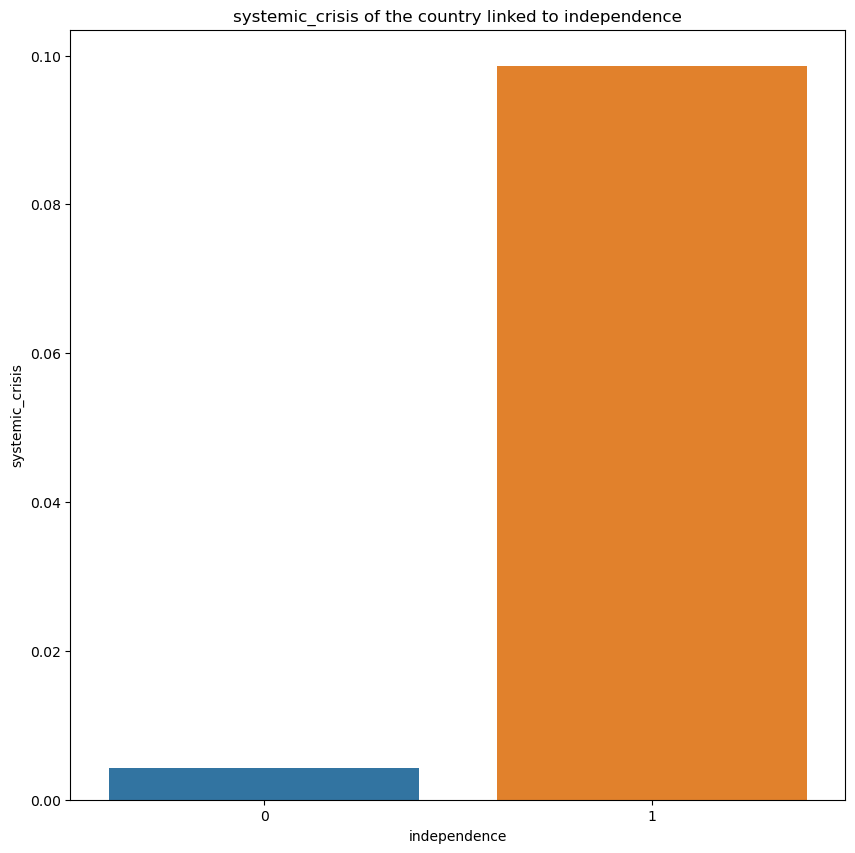

In [77]:
plt.figure(figsize=(10,10))

sns.barplot(data = acz, x = "independence", y = "systemic_crisis", ci=None) 

plt.xticks(rotation = 360)
plt.title('systemic_crisis of the country linked to independence')

In [78]:
pd.crosstab(acz["systemic_crisis"],acz["independence"], margins=True, normalize=False)

independence       0    1   All
systemic_crisis                
0                236  741   977
1                  1   81    82
All              237  822  1059

In [79]:
acz["systemic_crisis"].groupby(acz["currency_crises"]).mean()

currency_crises
0    0.065005
1    0.166667
2    0.000000
Name: systemic_crisis, dtype: float64

Text(0.5, 1.0, 'systemic_crisis of the country linked to currency_crises')

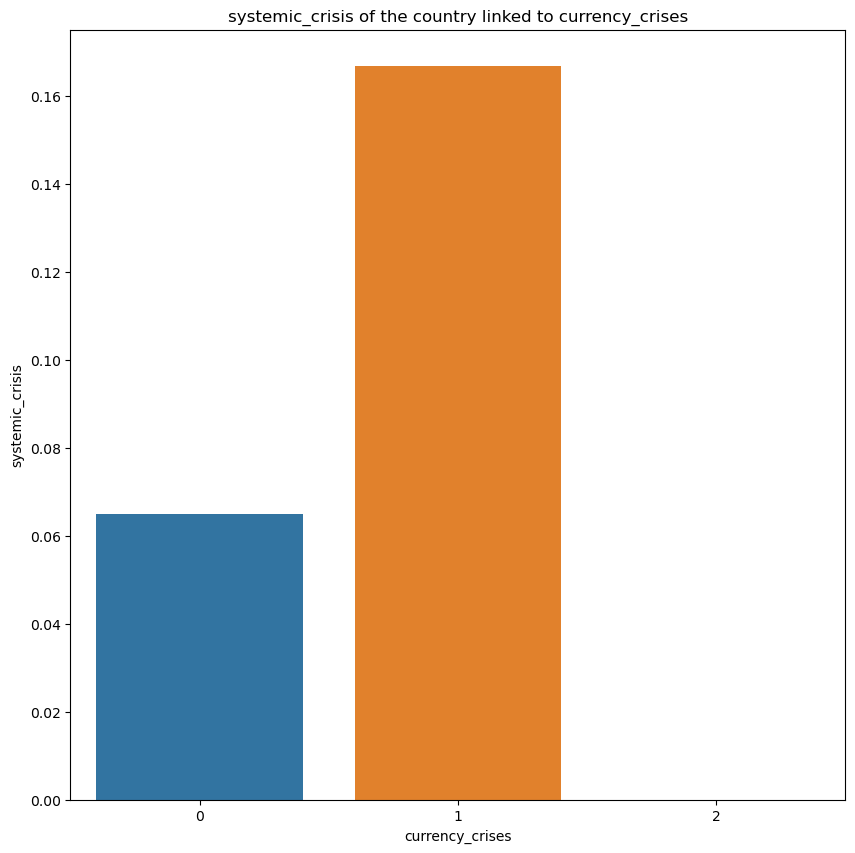

In [80]:
plt.figure(figsize=(10,10))

sns.barplot(data = acz, x = "currency_crises", y = "systemic_crisis", ci=None) 

plt.xticks(rotation = 360)
plt.title('systemic_crisis of the country linked to currency_crises')

In [81]:
pd.crosstab(acz["systemic_crisis"],acz["currency_crises"], margins=True, normalize=False)

currency_crises    0    1  2   All
systemic_crisis                   
0                863  110  4   977
1                 60   22  0    82
All              923  132  4  1059

In [82]:
acz["systemic_crisis"].groupby(acz["inflation_crises"]).mean()

inflation_crises
0    0.059653
1    0.197080
Name: systemic_crisis, dtype: float64

Text(0.5, 1.0, 'systemic_crisis of the country linked to inflation_crises')

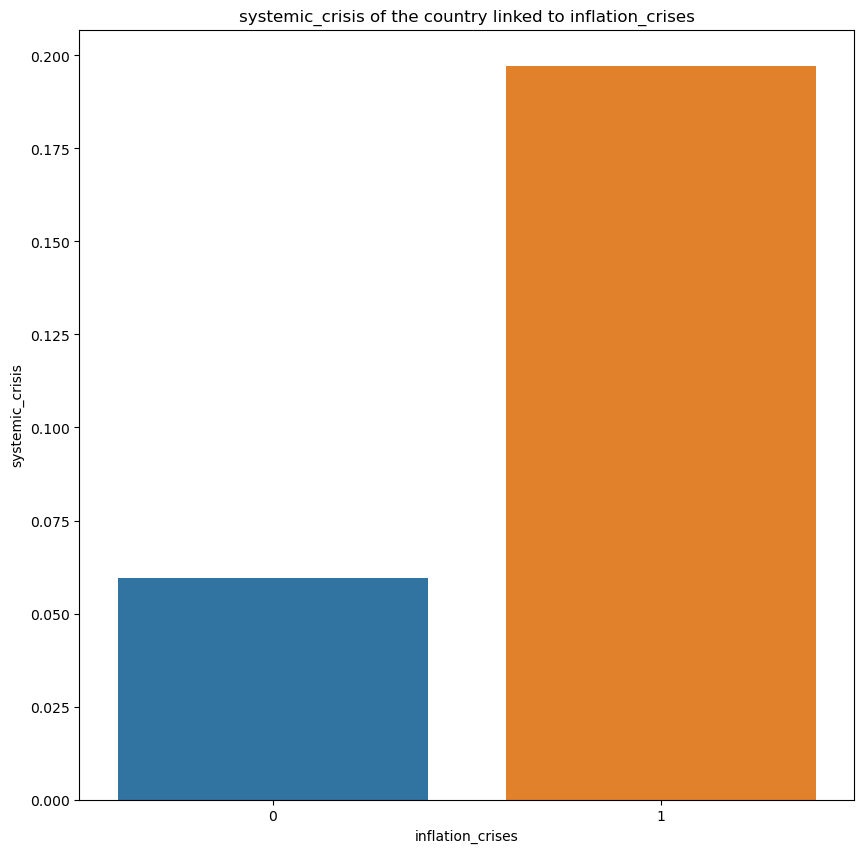

In [83]:
plt.figure(figsize=(10,10))

sns.barplot(data = acz, x = "inflation_crises", y = "systemic_crisis", ci=None) 

plt.xticks(rotation = 360)
plt.title('systemic_crisis of the country linked to inflation_crises')

In [84]:
pd.crosstab(acz["systemic_crisis"],acz["inflation_crises"], margins=True, normalize=False)

inflation_crises    0    1   All
systemic_crisis                 
0                 867  110   977
1                  55   27    82
All               922  137  1059

In [85]:
acz["systemic_crisis"].groupby(acz["banking_crisis"]).mean()

banking_crisis
0    0.808511
1    0.006218
Name: systemic_crisis, dtype: float64

Text(0.5, 1.0, 'systemic_crisis of the country linked to banking_crisis')

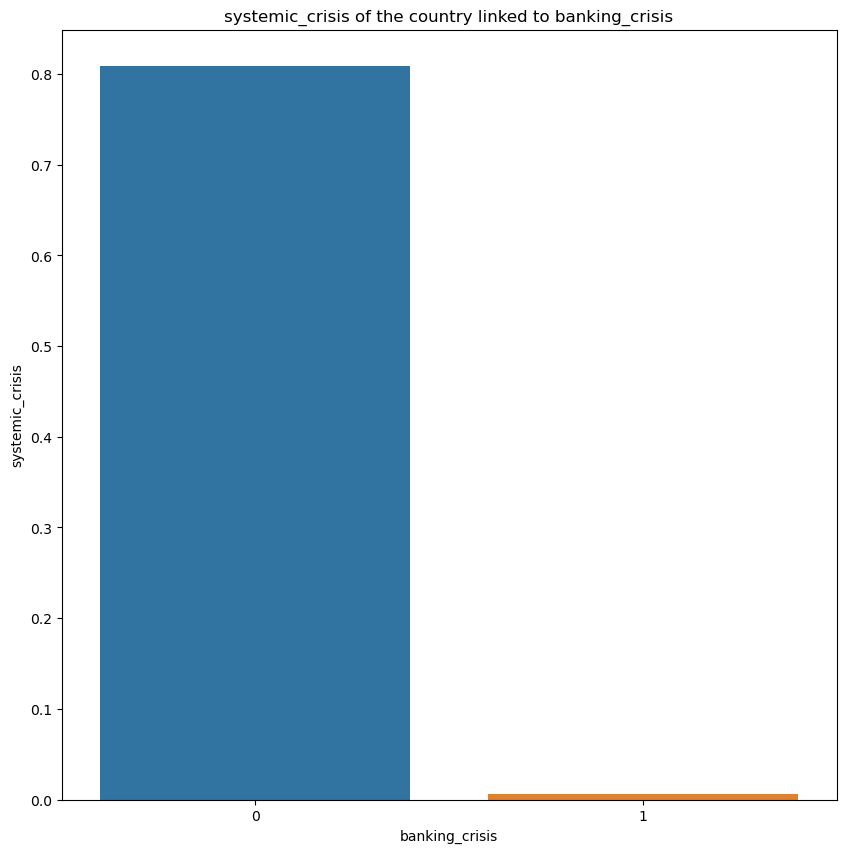

In [86]:
plt.figure(figsize=(10,10))

sns.barplot(data = acz, x = "banking_crisis", y = "systemic_crisis", ci=None) 

plt.xticks(rotation = 360)
plt.title('systemic_crisis of the country linked to banking_crisis')

In [87]:
pd.crosstab(acz["systemic_crisis"],acz["banking_crisis"], margins=True, normalize=False)

banking_crisis    0    1   All
systemic_crisis               
0                18  959   977
1                76    6    82
All              94  965  1059

# First Scenario 

In [88]:
acz["systemic_crisis"].groupby(acz["inflation_crises"]).mean()

inflation_crises
0    0.059653
1    0.197080
Name: systemic_crisis, dtype: float64

Text(0.5, 1.0, 'systemic_crisis and inflation_crises')

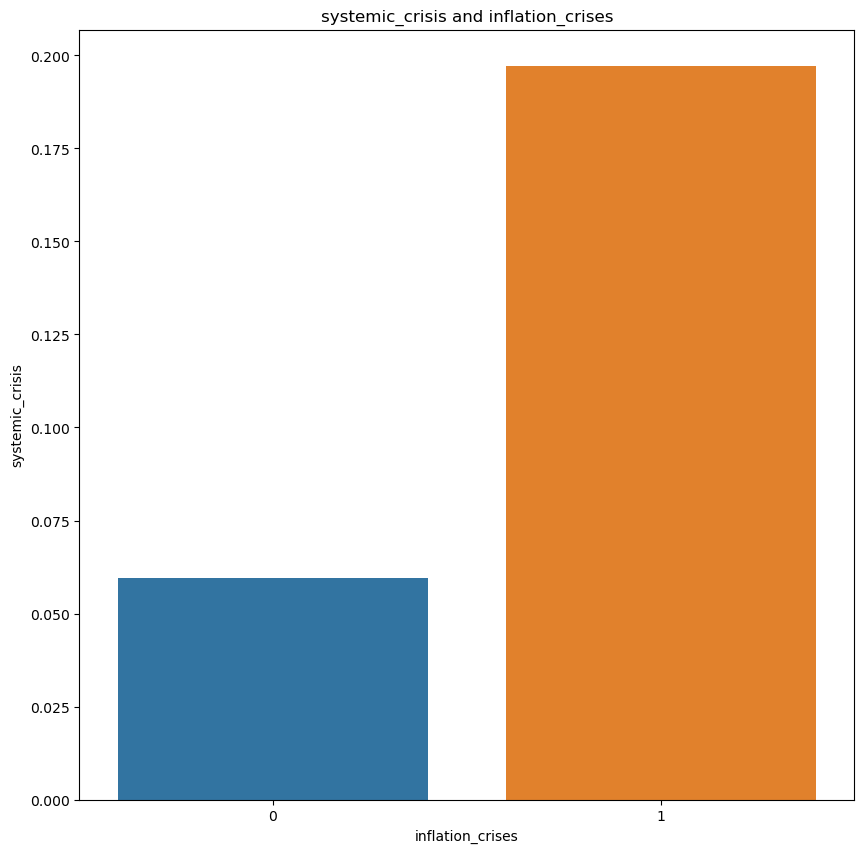

In [89]:
plt.figure(figsize=(10,10))

sns.barplot(data = acz, x = "inflation_crises", y = "systemic_crisis", ci=None) 

plt.xticks(rotation = 360)

plt.title('systemic_crisis and inflation_crises')

In [90]:
pd.crosstab(acz["systemic_crisis"],acz["inflation_crises"], margins=True, normalize=False)

inflation_crises    0    1   All
systemic_crisis                 
0                 867  110   977
1                  55   27    82
All               922  137  1059

In [91]:
acz["inflation_crises"].value_counts()

0    922
1    137
Name: inflation_crises, dtype: int64

In [92]:
acz["inflation_crises"].value_counts(sum)

0    0.870633
1    0.129367
Name: inflation_crises, dtype: float64

In [93]:
acz["systemic_crisis"].value_counts()

0    977
1     82
Name: systemic_crisis, dtype: int64

In [94]:
acz["systemic_crisis"].value_counts(sum)

0    0.922568
1    0.077432
Name: systemic_crisis, dtype: float64

Text(0.5, 1.0, 'Stat Breakdown of systemic_crisis and inflation_crises')

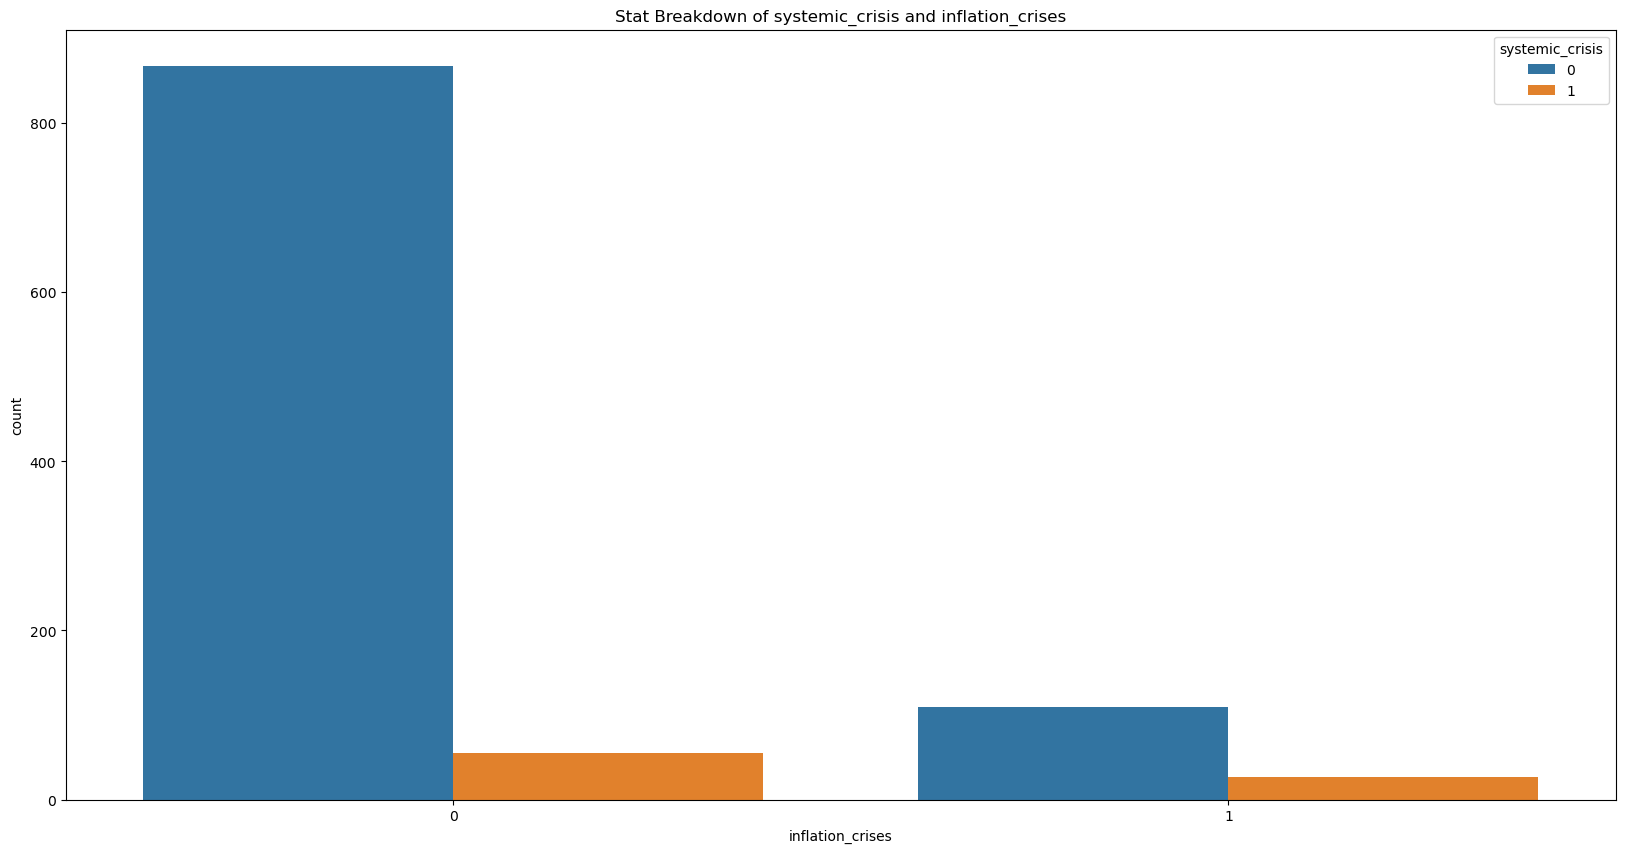

In [95]:
plt.figure(figsize=(20,10))

sns.countplot(data = acz, x = "inflation_crises", hue = "systemic_crisis")

plt.xticks(rotation = 360)

plt.title('Stat Breakdown of systemic_crisis and inflation_crises')

In [96]:
pivot_table = acz.pivot_table(index='systemic_crisis', columns='inflation_crises', values='banking_crisis', aggfunc='sum', margins=False)
print(pivot_table)

inflation_crises    0    1
systemic_crisis           
0                 859  100
1                   5    1


Text(0.5, 1.0, 'Stat Breakdown of systemic_crisis and inflation_crises')

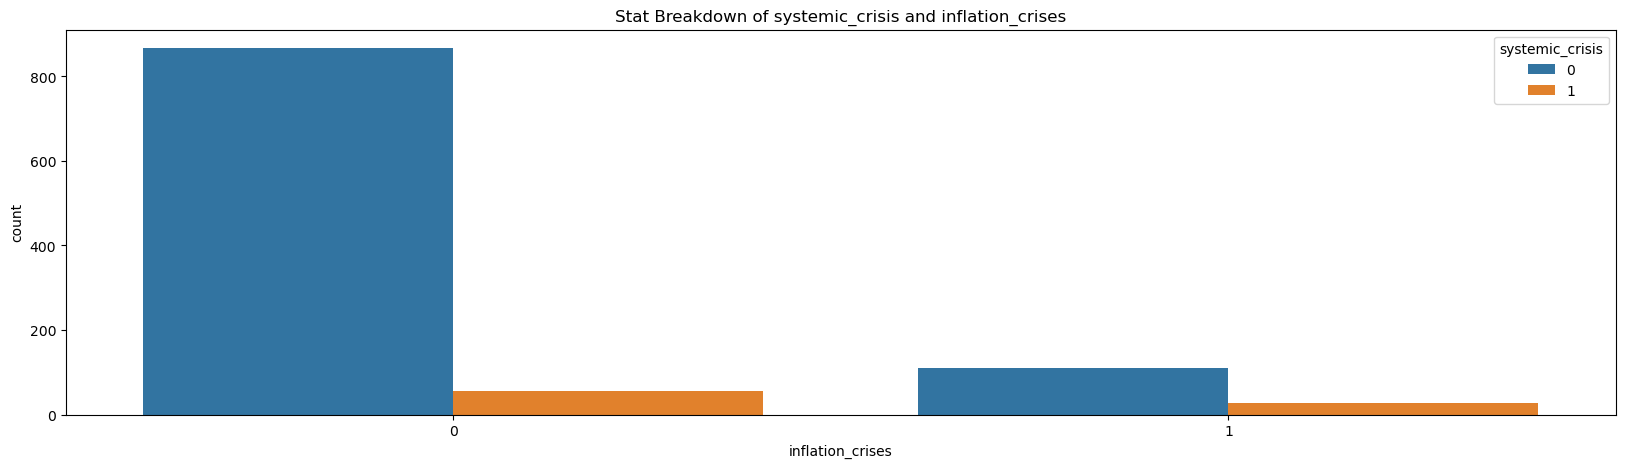

In [97]:
plt.figure(figsize=(20,5))

sns.countplot(data = acz, x = "inflation_crises", hue = "systemic_crisis")

plt.xticks(rotation = 360)

plt.title('Stat Breakdown of systemic_crisis and inflation_crises')

In [98]:
acz["systemic_crisis"].groupby(acz["banking_crisis"]).mean()

banking_crisis
0    0.808511
1    0.006218
Name: systemic_crisis, dtype: float64

In [99]:
acz["banking_crisis"].groupby(acz["systemic_crisis"]).max()

systemic_crisis
0    1
1    1
Name: banking_crisis, dtype: int64

In [100]:
acz["banking_crisis"].groupby(acz["systemic_crisis"]).min()

systemic_crisis
0    0
1    0
Name: banking_crisis, dtype: int64

# Second Scenario 

In [101]:
acz["systemic_crisis"].groupby(acz["domestic_debt_in_default"]).mean()

domestic_debt_in_default
0    0.070796
1    0.238095
Name: systemic_crisis, dtype: float64

Text(0.5, 1.0, 'systemic_crisis and domestic_debt_in_default')

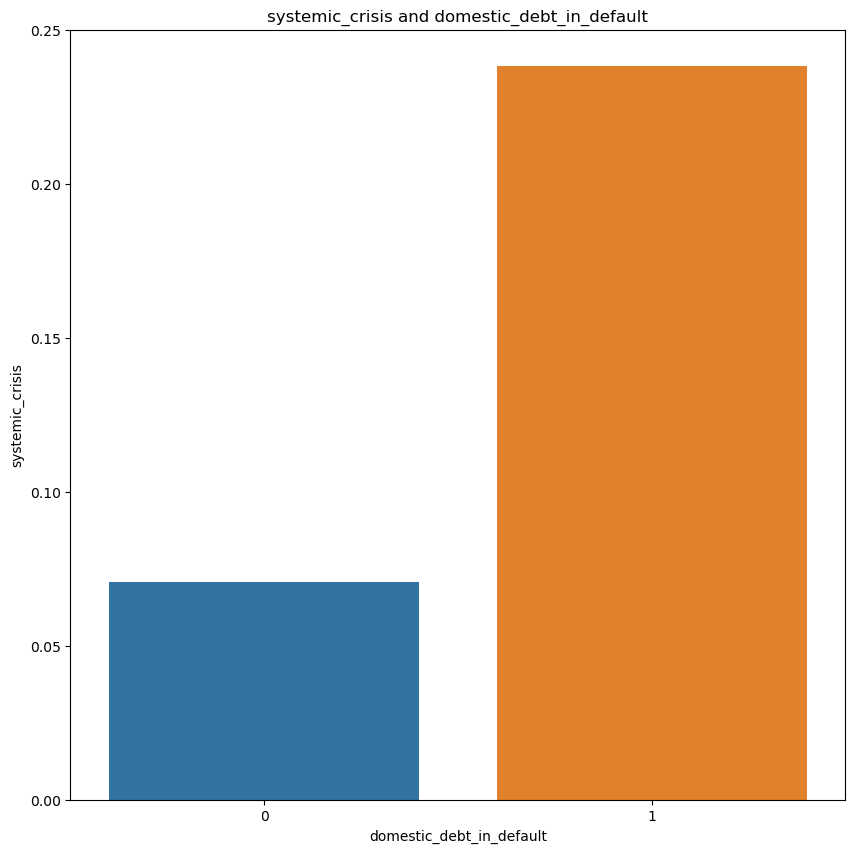

In [102]:
plt.figure(figsize=(10,10))

sns.barplot(data = acz, x = "domestic_debt_in_default", y = "systemic_crisis", ci=None) 

plt.xticks(rotation = 360)

plt.title('systemic_crisis and domestic_debt_in_default')

In [103]:
pd.crosstab(acz["systemic_crisis"],acz["domestic_debt_in_default"], margins=True, normalize=False)

domestic_debt_in_default     0   1   All
systemic_crisis                         
0                          945  32   977
1                           72  10    82
All                       1017  42  1059

In [104]:
acz["domestic_debt_in_default"].value_counts()

0    1017
1      42
Name: domestic_debt_in_default, dtype: int64

In [105]:
acz["domestic_debt_in_default"].value_counts(sum)

0    0.96034
1    0.03966
Name: domestic_debt_in_default, dtype: float64

In [106]:
acz["systemic_crisis"].value_counts()

0    977
1     82
Name: systemic_crisis, dtype: int64

In [107]:
acz["systemic_crisis"].value_counts(sum)

0    0.922568
1    0.077432
Name: systemic_crisis, dtype: float64

Text(0.5, 1.0, 'Stat Breakdown of systemic_crisis and domestic_debt_in_default')

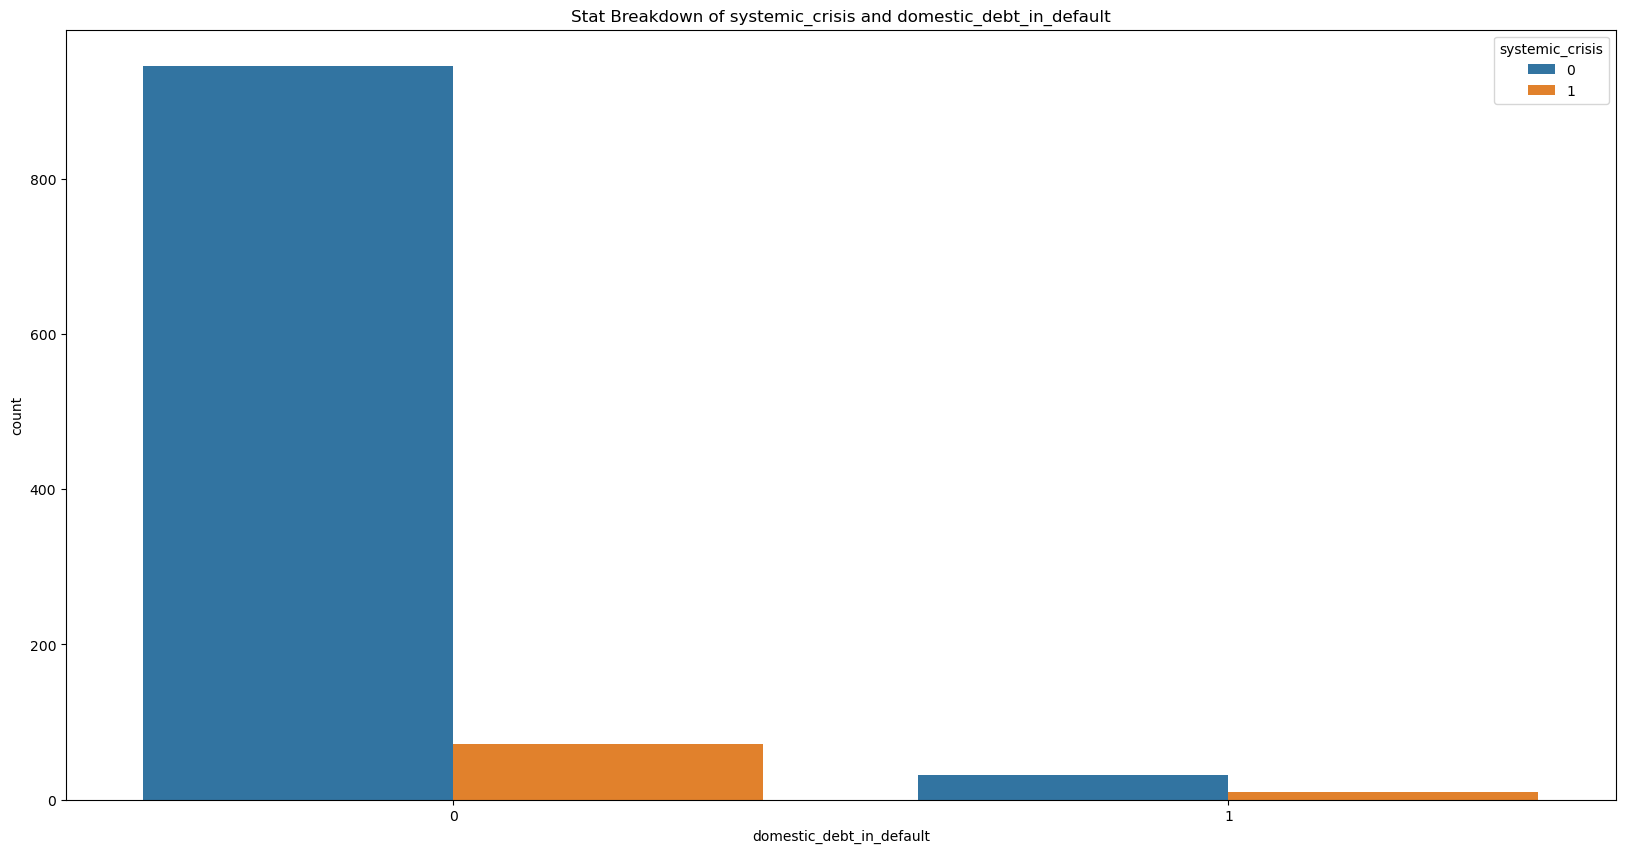

In [108]:
plt.figure(figsize=(20,10))

sns.countplot(data = acz, x = "domestic_debt_in_default", hue = "systemic_crisis")

plt.xticks(rotation = 360)

plt.title('Stat Breakdown of systemic_crisis and domestic_debt_in_default')

In [109]:
pivot_table = acz.pivot_table(index='systemic_crisis', columns='domestic_debt_in_default', values='banking_crisis', aggfunc='sum', margins=False)
print(pivot_table)

domestic_debt_in_default    0   1
systemic_crisis                  
0                         934  25
1                           6   0


Text(0.5, 1.0, 'Stat Breakdown of systemic_crisis and domestic_debt_in_default')

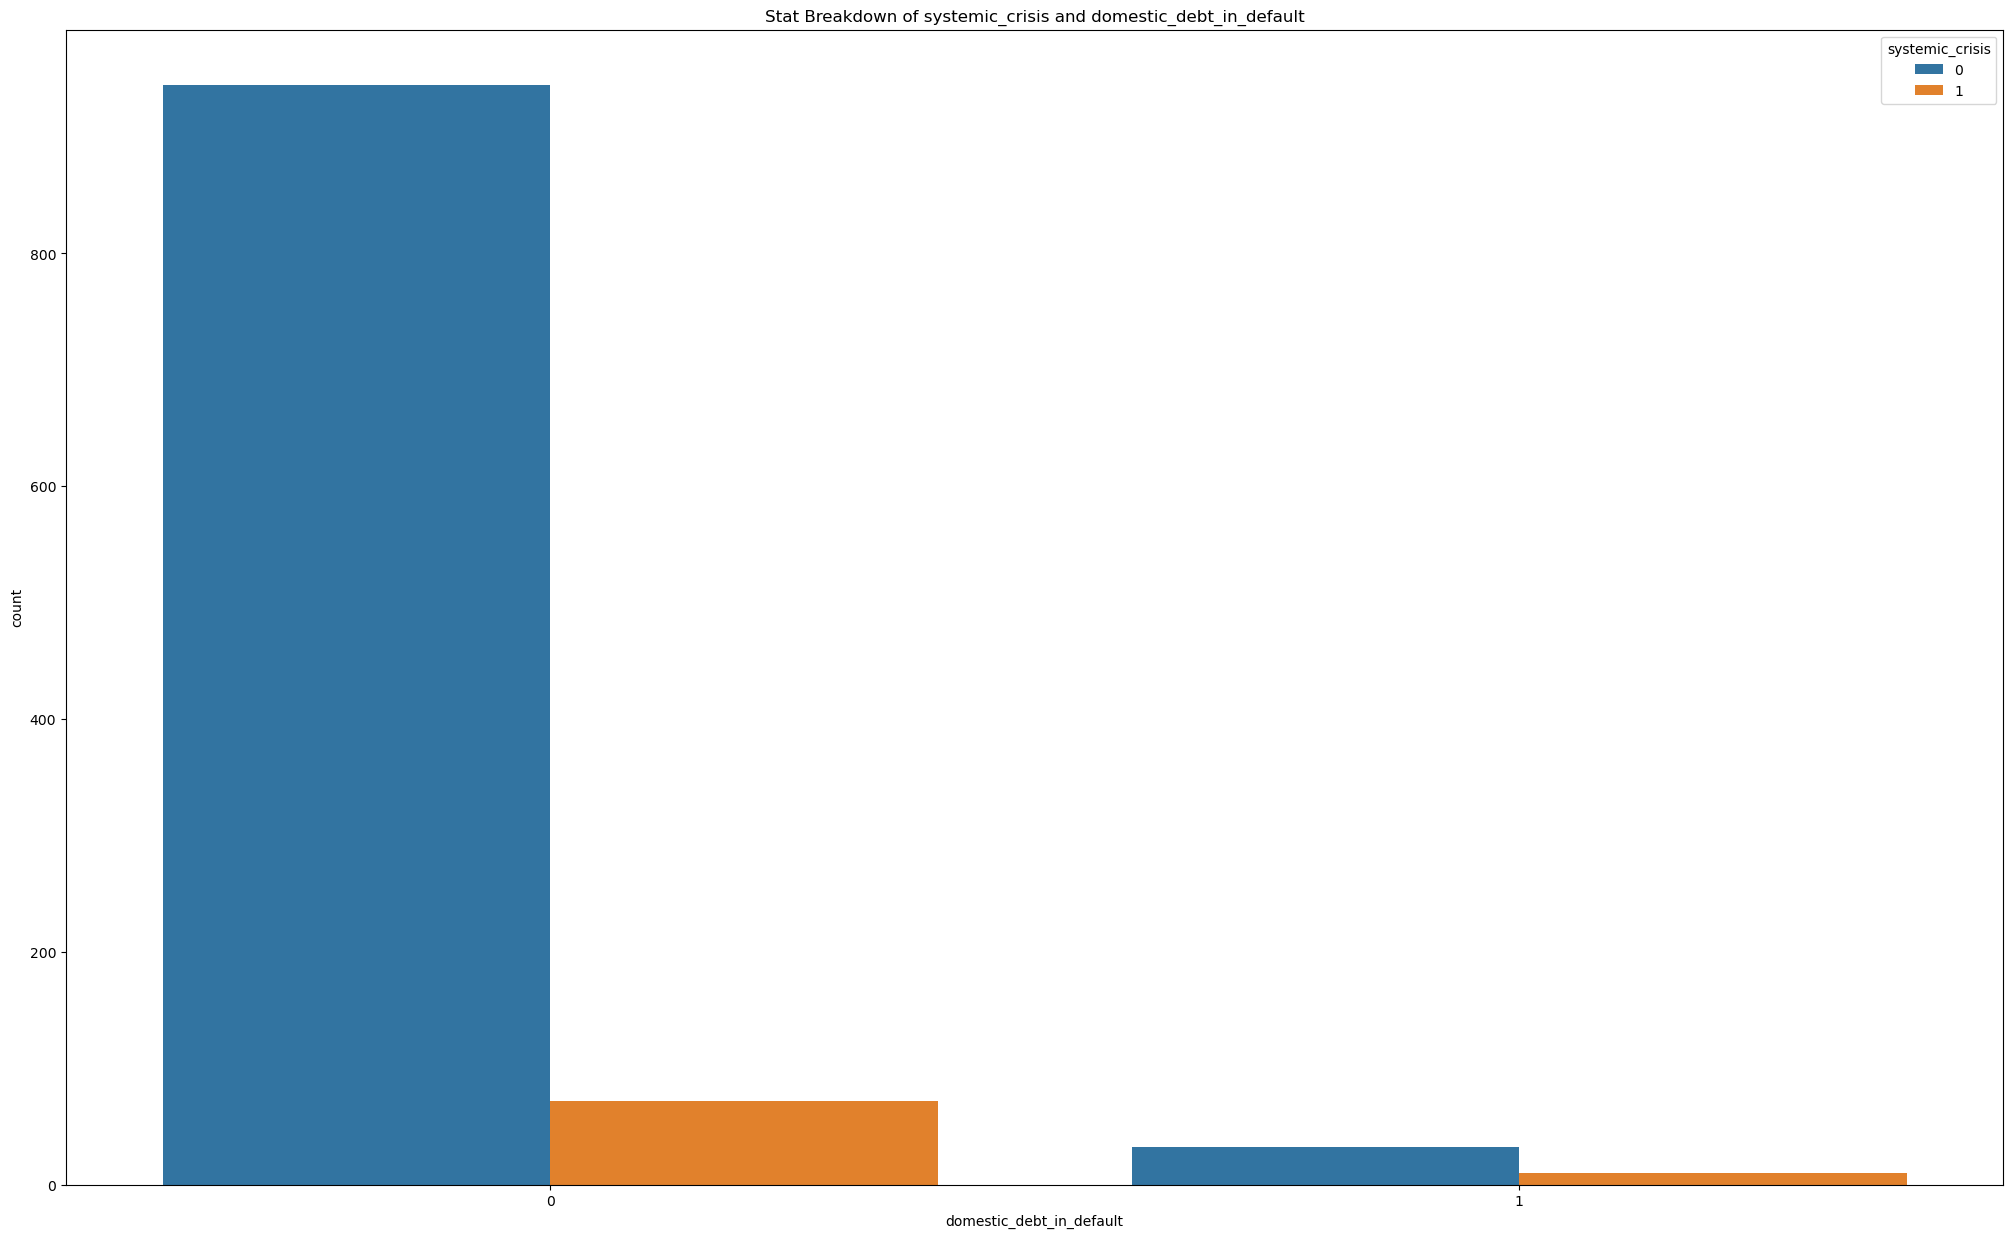

In [110]:
plt.figure(figsize=(25,15))

sns.countplot(data = acz, x = "domestic_debt_in_default", hue = "systemic_crisis")

plt.xticks(rotation = 360)

plt.title('Stat Breakdown of systemic_crisis and domestic_debt_in_default')

In [111]:
acz["domestic_debt_in_default"].groupby(acz["systemic_crisis"]).mean()

systemic_crisis
0    0.032753
1    0.121951
Name: domestic_debt_in_default, dtype: float64

In [112]:
acz["domestic_debt_in_default"].groupby(acz["systemic_crisis"]).mean()

systemic_crisis
0    0.032753
1    0.121951
Name: domestic_debt_in_default, dtype: float64

In [113]:
acz["domestic_debt_in_default"].groupby(acz["systemic_crisis"]).mean()

systemic_crisis
0    0.032753
1    0.121951
Name: domestic_debt_in_default, dtype: float64

# <font color=GOLDENROD>Data Modeling </font>

In [114]:
mod1 = sm.logit("systemic_crisis ~ domestic_debt_in_default + inflation_crises + banking_crisis", data=acz).fit()

mod1.summary()

Optimization terminated successfully.
         Current function value: 0.075010
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        systemic_crisis   No. Observations:                 1059
Model:                          Logit   Df Residuals:                     1055
Method:                           MLE   Df Model:                            3
Date:                Sat, 13 May 2023   Pseudo R-squ.:                  0.7247
Time:                        16:30:36   Log-Likelihood:                -79.436
converged:                       True   LL-Null:                       -288.53
Covariance Type:            nonrobust   LLR p-value:                 2.553e-90
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    1.8106      0.366      4.948      0.000       1.093       2.528
domestic_debt_in_default    -1.4107      0.717     -1.966      0.049      -2.817      -0.004
inflation_crises            -0.0559      0.619     -0.090      0.928      -1.270       1.158
banking_crisis              -6.8593      0.533    -12.865      0.000      -7.904      -5.814
============================================================================================
"""

In [115]:
mod1.params

Intercept                   1.810608
domestic_debt_in_default   -1.410661
inflation_crises           -0.055928
banking_crisis             -6.859259
dtype: float64

In [116]:
acz_odds = pd.DataFrame(np.exp(mod1.params), columns = ['OR'])

acz_odds["pvalue"] = mod1.pvalues

acz_odds["Sig"] = np.where(acz_odds["pvalue"] <= 0.05, "Sig", "Not Sig")

acz_odds

OR        pvalue      Sig
Intercept                 6.114166  7.482547e-07      Sig
domestic_debt_in_default  0.243982  4.927405e-02      Sig
inflation_crises          0.945607  9.280548e-01  Not Sig
banking_crisis            0.001050  7.064575e-38      Sig

In [117]:
# percent change formula = OR minus 1 multiplied by 100

acz_odds["Pct Change"] = (acz_odds["OR"] - 1) * 100

acz_odds

OR        pvalue      Sig  Pct Change
Intercept                 6.114166  7.482547e-07      Sig  511.416627
domestic_debt_in_default  0.243982  4.927405e-02      Sig  -75.601814
inflation_crises          0.945607  9.280548e-01  Not Sig   -5.439262
banking_crisis            0.001050  7.064575e-38      Sig  -99.895031

In [122]:
mod1.predict({
    "systemic_crisis": 1,
    "domestic_debt_in_default": 2,
    "inflation_crises": 2,
    "banking_crisis": 1})

0    0.000341
dtype: float64

In [123]:
mod1.predict({
    "systemic_crisis": 0,
    "domestic_debt_in_default": 3,
    "inflation_crises": 1,
    "banking_crisis": 3})

0    9.711936e-11
dtype: float64

In [124]:
mod1.predict({
    "systemic_crisis": 0,
    "domestic_debt_in_default": 1,
    "inflation_crises": 1,
    "banking_crisis": 2})

0    0.000002
dtype: float64

# <font color=GOLDENROD>Data Visulization </font>

In [125]:
import seaborn as sns

<AxesSubplot:xlabel='domestic_debt_in_default', ylabel='Density'>

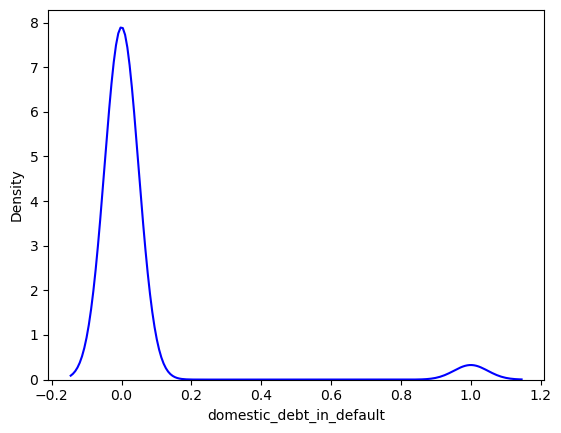

In [126]:
# Simple density plot to show the distribution of domestic_debt_in_default at country level

sns.kdeplot(acz['domestic_debt_in_default'], shade = False, color = "blue")

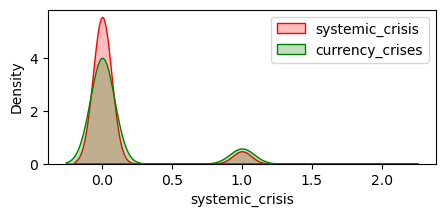

In [127]:
# Plotting two density plots in the same figure 

plt.figure(figsize=(5,2)) # change the figure size

sns.kdeplot(acz['systemic_crisis'], shade = True, color = "red", label = "systemic_crisis")
sns.kdeplot(acz['currency_crises'], shade = True, color = "green", label = "currency_crises")

plt.legend() # add a legend 
plt.show() # show both plots in the same figure 

<AxesSubplot:xlabel='sovereign_external_debt_default', ylabel='Count'>

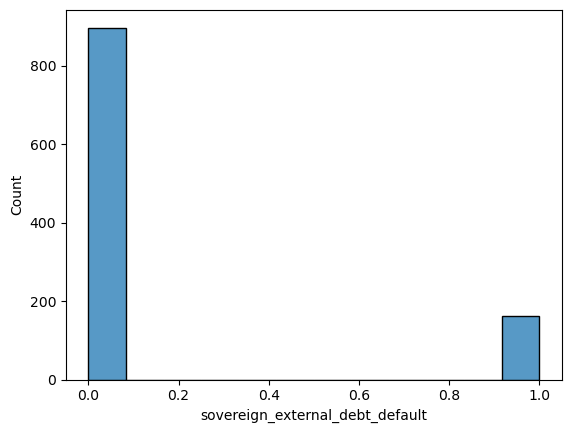

In [128]:
sns.histplot(acz["sovereign_external_debt_default"], kde = False)

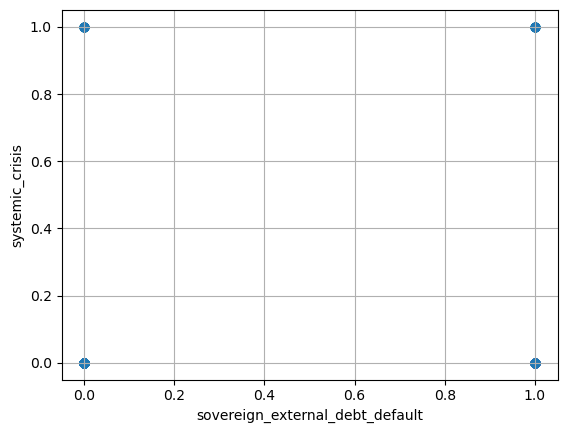

In [129]:
sns.regplot(x = acz["sovereign_external_debt_default"], y = acz["systemic_crisis"], fit_reg = False)
plt.grid()

<AxesSubplot:xlabel='sovereign_external_debt_default'>

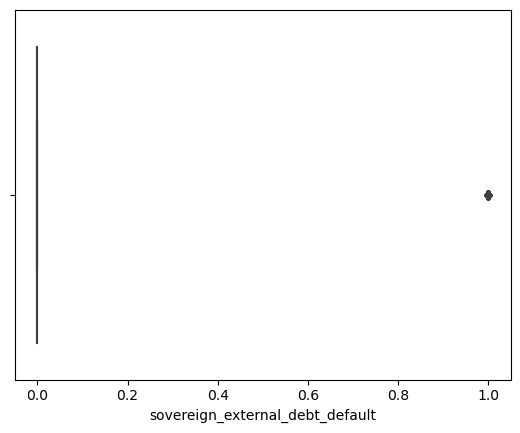

In [130]:
sns.boxplot(x = acz["sovereign_external_debt_default"])

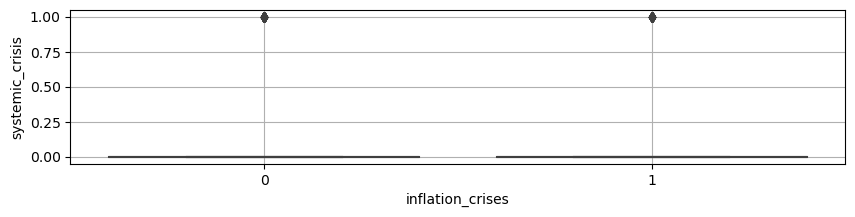

In [131]:
plt.figure(figsize=(10,2)) # adjust the size of the output plot

sns.boxplot(x = acz["inflation_crises"], y = acz["systemic_crisis"])

plt.grid() # add grid lines to plot

Text(0.5, 1.0, 'Average currency_crises of domestic_debt_in_default')

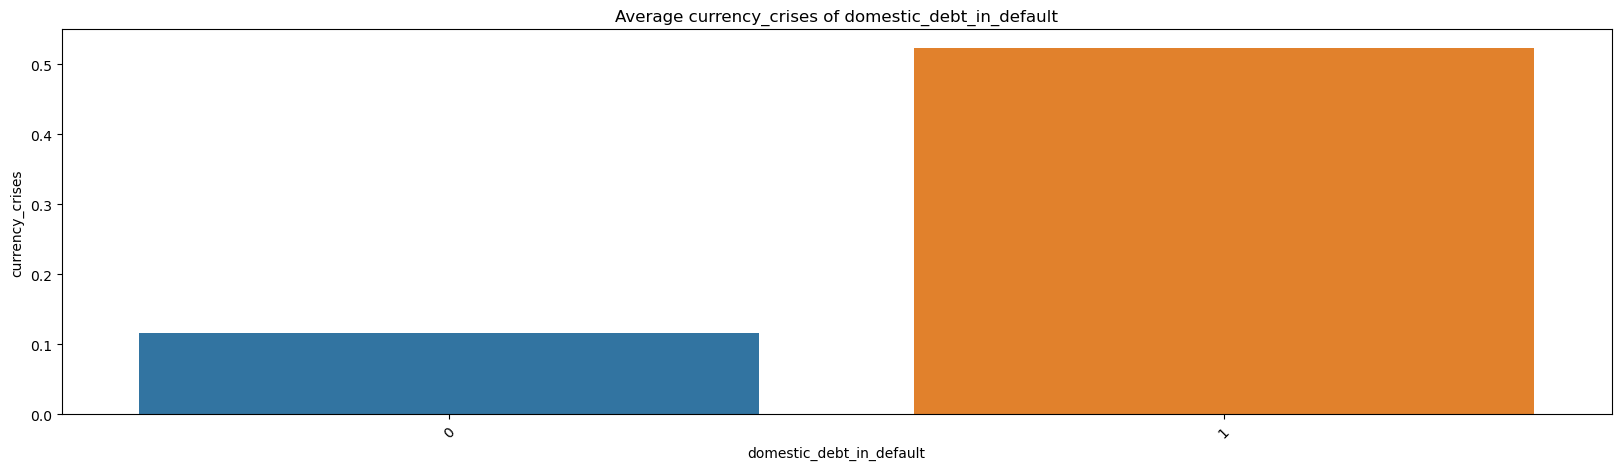

In [132]:
# Create a barplot to show average domestic_debt_in_default vs currency_crises

plt.figure(figsize=(20,5))

sns.barplot(data = acz, x = "domestic_debt_in_default", y = "currency_crises", ci = None)

plt.xticks(rotation = 45)
plt.title('Average currency_crises of domestic_debt_in_default')

Text(0.5, 1.0, 'Average independence by systemic_crisis')

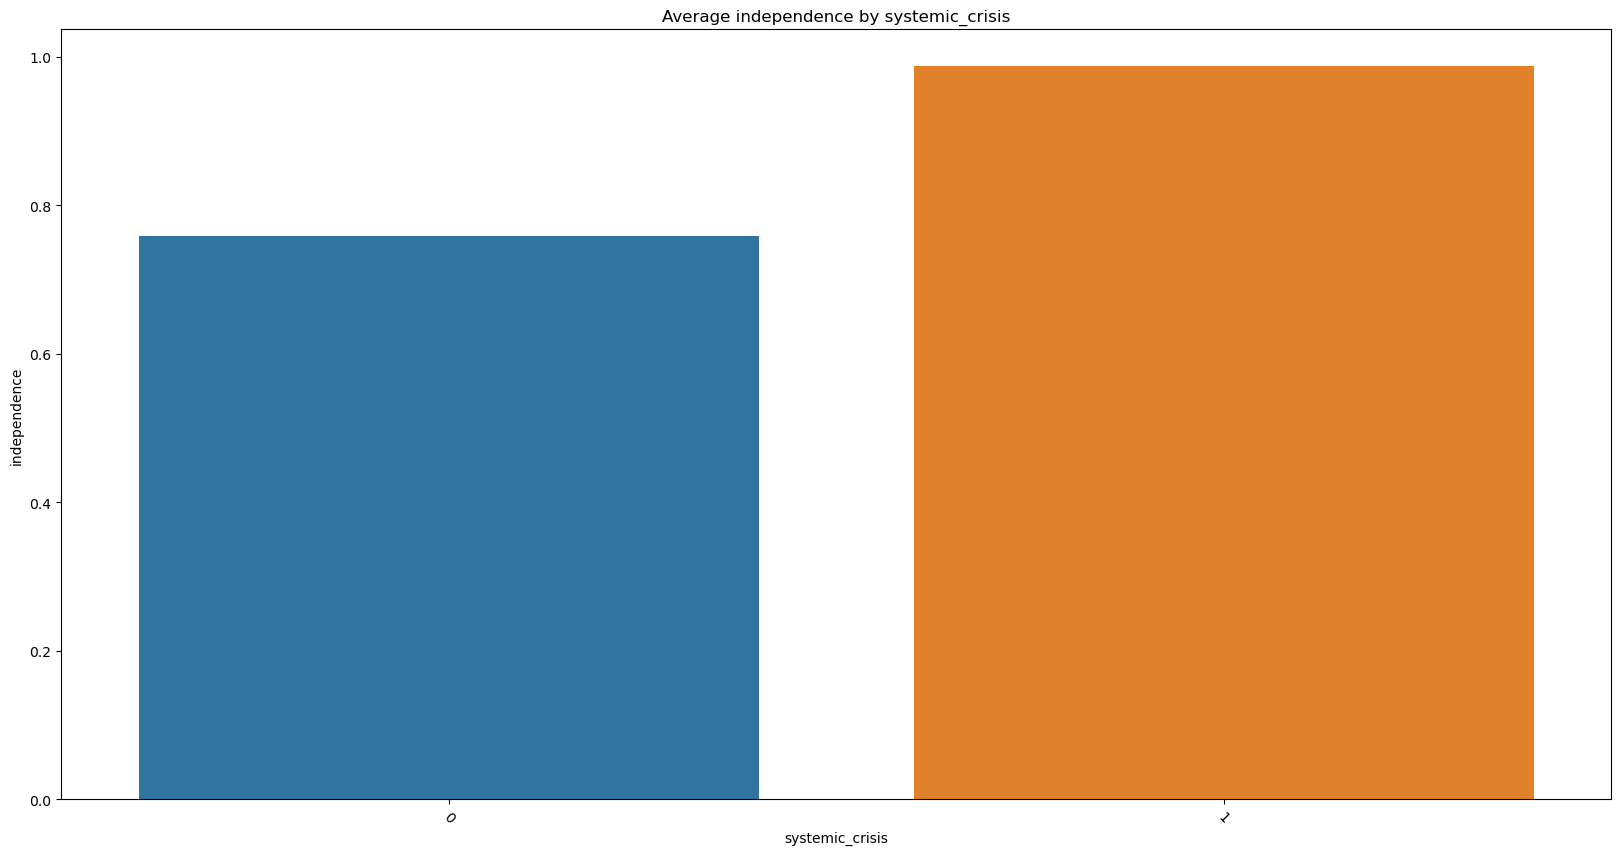

In [133]:
# Create a barplot showing the average systemic_crisis by independenc

plt.figure(figsize=(20,10))

sns.barplot(data = acz, x = "systemic_crisis", y = "independence", ci = None)

plt.xticks(rotation = -45)
plt.title('Average independence by systemic_crisis')

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

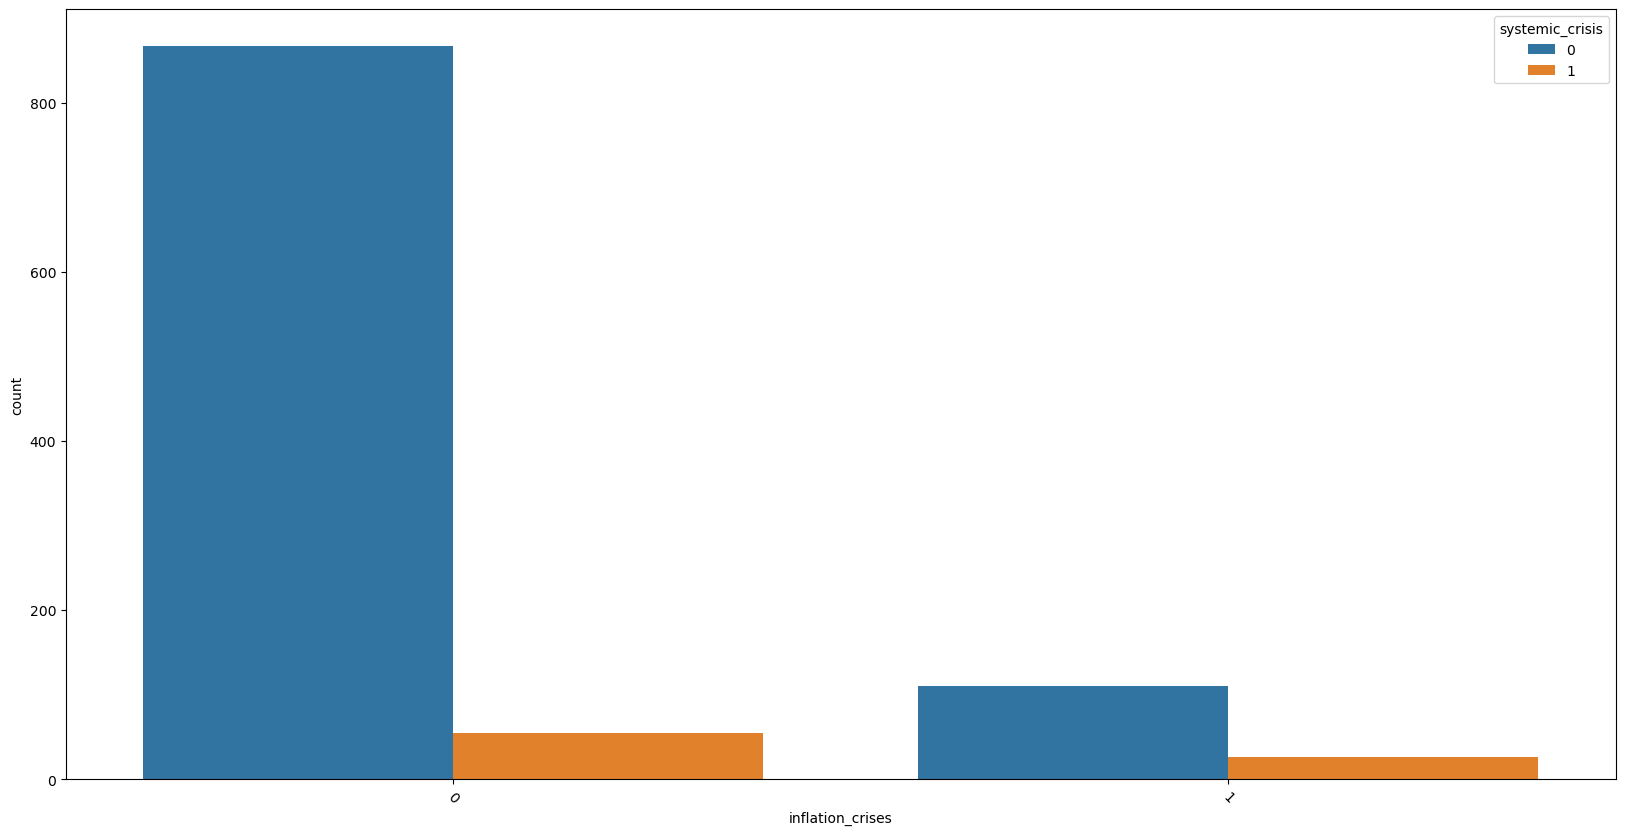

In [134]:

plt.figure(figsize=(20,10))

sns.countplot(data = acz, x = "inflation_crises", hue = "systemic_crisis")

plt.xticks(rotation = -45)

In [136]:
acz.to_excel("africadata.xlsx")